# Traveling Salesman problem
Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?

## Input data

In [1]:
import numpy as np # for fast arithmetics
import matplotlib.pyplot as plt

In [2]:
# City names alphabetically
cityNames = ['Винница','Днепр','Житомир','Запорожье','Ивано-Франковск','Киев','Кропивницкий','Луцк','Львов','Николаев','Одесса','Полтава','Ровно','Сумы','Тернополь','Ужгород','Харьков','Херсон','Хмельницкий','Черкассы','Чернигов','Черновцы']
# Geographical coordinates in degrees (for visualization)
latitude = np.array([49.2347128, 48.4622135, 50.2678654, 47.8561438, 48.9117518, 50.401699, 48.5187443, 50.73977, 49.8326679, 46.9329791,46.4598865,49.6021346,50.6199879,50.9077873,49.5483334,48.6208922,49.9934789,46.6353956,49.4229619,49.4444119,51.4981791,48.2920574])
longitude = np.array([28.3995942, 34.8602731, 28.6036778, 35.0352701, 24.6470892, 30.2525101, 32.1456232, 25.2639651, 23.9421958, 31.8679134, 30.5717031,34.4871983,26.1815768,34.7280598,25.5276293,22.2178427,36.1603433,32.5468272,26.9170934,31.9897273,31.2193102,25.8657969])
# https://distancecalculator.globefeed.com/Ukraine_Distance_Calculator.asp
import math # factorial
N = len(cityNames); print("Number of cities: ",N)
print("Possible ways: ",math.factorial(N-1))
print(cityNames)

Number of cities:  22
Possible ways:  51090942171709440000
['Винница', 'Днепр', 'Житомир', 'Запорожье', 'Ивано-Франковск', 'Киев', 'Кропивницкий', 'Луцк', 'Львов', 'Николаев', 'Одесса', 'Полтава', 'Ровно', 'Сумы', 'Тернополь', 'Ужгород', 'Харьков', 'Херсон', 'Хмельницкий', 'Черкассы', 'Чернигов', 'Черновцы']


In [3]:
# Distance matrix using maps.google.com, by car.
d = np.array([
    [  0, 588, 128, 651, 368, 268, 322, 389, 364, 431, 426, 595, 277, 603, 236, 585, 707, 497, 120, 335, 411, 288],
    [588,   0, 596,85.4, 962, 480, 247, 875, 957, 322, 454, 164, 805, 358, 829,1180, 217, 329, 714, 286, 542, 844],
    [128, 596,   0, 690, 413, 140, 392, 261, 402, 507, 501, 480, 188, 475, 280, 657, 617, 573, 183, 308, 283, 371],
    [651,85.4, 690,   0,1026, 538, 310, 952,1021, 376, 508, 264, 860, 437, 893,1243, 297, 314, 778, 350, 620, 908],
    [368, 962, 413,1026,   0, 560, 694, 263, 132, 780, 798, 931, 275, 895, 130, 293,1082, 869, 235, 696, 746, 135],
    [268, 480, 140, 538, 560,   0, 303, 400, 541, 481, 475, 344, 327, 369, 420, 796, 456, 547, 323, 192, 142, 531],
    [322, 247, 392, 310, 694, 303,   0, 670, 693, 182, 309, 246, 598, 426, 564, 915, 386, 243, 449, 129, 428, 579],
    [389, 875, 261, 952, 263, 400, 670,   0, 180, 779, 774, 740,72.6, 734, 167, 426, 877, 845, 257, 587, 543, 336],
    [364, 957, 402,1021, 132, 541, 693, 180,   0, 802, 797, 879, 211, 874, 134, 268,1018, 867, 241, 727, 683, 276],
    [431, 322, 507, 376, 780, 481, 182, 779, 802,   0, 132, 428, 706, 606, 673,1024, 542,70.1, 558, 311, 610, 688],
    [426, 454, 501, 508, 798, 475, 309, 774, 797, 132,   0, 560, 702, 770, 624,1020, 674, 201, 553, 417, 611, 683],
    [595, 164, 480, 264, 931, 344, 246, 740, 879, 428, 560,   0, 668, 177, 760,1128, 143, 491, 664, 243, 405, 827],
    [277, 805, 188, 860, 275, 327, 598,72.6, 211, 706, 702, 668,   0, 663, 159, 467, 804, 774, 195, 516, 471, 328],
    [603, 358, 475, 437, 895, 369, 426, 734, 874, 606, 770, 177, 663,   0, 783,1152, 187, 668, 656, 325, 297, 895],
    [236, 829, 280, 893, 130, 420, 564, 167, 134, 673, 624, 760, 159, 783,   0, 352, 897, 739, 111, 561, 562, 171],
    [585,1180, 657,1243, 293, 796, 915, 426, 268,1024,1020,1128, 467,1152, 352,   0,1265,1090, 462, 935, 931, 407],
    [707, 217, 617, 297,1082, 456, 386, 877,1018, 542, 674, 143, 804, 187, 897,1265,   0, 547, 800, 381, 508, 964],
    [497, 329, 573, 314, 869, 547, 243, 845, 867,70.1, 201, 491, 774, 668, 739,1090, 547,   0, 624, 373, 672, 754],
    [120, 714, 183, 778, 235, 323, 449, 257, 241, 558, 553, 664, 195, 656, 111, 462, 800, 624,   0, 447, 467, 189],
    [335, 286, 308, 350, 696, 192, 129, 587, 727, 311, 417, 243, 516, 325, 561, 935, 381, 373, 447,   0, 297, 600],
    [411, 542, 283, 620, 746, 142, 428, 543, 683, 610, 611, 405, 471, 297, 562, 931, 508, 672, 467, 297,   0, 672],
    [288, 844, 371, 908, 135, 531, 579, 336, 276, 688, 683, 827, 328, 895, 171, 407, 964, 754, 189, 600, 672,   0]])

# Time by car
t = np.array([
    [  0, 484,  99, 521, 336, 236, 266, 311, 323, 357, 298, 434, 238, 493, 181, 520, 565, 401, 118, 292, 326, 268],
    [484,   0, 474,  82, 866, 407, 234, 706, 765, 274, 398, 175, 613, 322, 688, 980, 165, 292, 589, 288, 436, 722],
    [ 99, 474,   0, 582, 396, 101, 352, 204, 304, 419, 367, 337, 130, 384, 248, 497, 458, 476, 176, 253, 221, 340],
    [521,  82, 582,   0, 898, 483, 271, 784, 826, 305, 431, 244, 675, 377, 723,1016, 240, 280, 629, 331, 498, 765],
    [336, 866, 396, 898,   0, 482, 623, 259, 124, 692, 634, 714, 245, 774, 151, 257, 807, 725, 228, 617, 594, 124],
    [236, 407, 101, 483, 482,   0, 263, 309, 383, 377, 319, 240, 222, 279, 356, 595, 347, 423, 263, 153, 119, 429],
    [266, 234, 352, 271, 623, 263,   0, 589, 581, 141, 263, 236, 473, 401, 472, 773, 340, 207, 390, 114, 345, 520],
    [311, 706, 204, 784, 259, 309, 589,   0, 166, 632, 575, 553,  64, 597, 155, 370, 649, 662, 229, 450, 421, 298],
    [323, 765, 304, 826, 124, 383, 581, 166,   0, 663, 602, 633, 164, 692, 124, 240, 731, 690, 193, 548, 518, 250],
    [357, 274, 419, 305, 692, 377, 141, 632, 663,   0, 124, 383, 540, 543, 541, 884, 432,  67, 450, 255, 492, 588],
    [298, 398, 367, 431, 634, 319, 263, 575, 602, 124,   0, 488, 499, 593, 491, 831, 556, 177, 405, 333, 438, 537],
    [434, 175, 337, 244, 714, 240, 236, 553, 633, 383, 488,   0, 483, 202, 606, 846, 124, 409, 516, 214, 301, 687],
    [238, 613, 130, 675, 245, 222, 473,  64, 164, 540, 499, 483,   0, 534, 142, 381, 568, 592, 181, 379, 351, 287],
    [493, 322, 384, 377, 774, 279, 401, 597, 692, 543, 593, 202, 534,   0, 657, 884, 182, 574, 559, 283, 260, 731],
    [181, 688, 248, 723, 151, 356, 472, 155, 124, 541, 491, 606, 142, 657,   0, 325, 694, 589,  91, 484, 479, 153],
    [520, 980, 497,1016, 257, 595, 773, 370, 240, 884, 831, 846, 381, 884, 325,   0, 950, 888, 409, 753, 720, 373],
    [565, 165, 458, 240, 807, 347, 340, 649, 731, 432, 556, 124, 568, 182, 694, 950,   0, 444, 633, 323, 413, 800],
    [401, 292, 476, 280, 725, 423, 207, 662, 690,  67, 177, 409, 592, 574, 589, 888, 444,   0, 502, 299, 537, 635],
    [118, 589, 176, 629, 228, 263, 390, 229, 193, 450, 405, 516, 181, 559,  91, 409, 633, 502,   0, 413, 397, 172],
    [292, 288, 253, 331, 617, 153, 114, 450, 548, 255, 333, 214, 379, 283, 484, 753, 323, 299, 413,   0, 227, 534],
    [326, 436, 221, 498, 594, 119, 345, 421, 518, 492, 438, 301, 351, 260, 479, 720, 413, 537, 397, 227,   0, 564],
    [268, 722, 340, 765, 124, 429, 520, 298, 250, 588, 537, 687, 287, 731, 153, 373, 800, 635, 172, 534, 564,   0]])

## Approach
1) The initial arrangement of <i>N</i> cities is arbitrary. The last item in the list is the same as the 1st element.<br>
2) Starting with the 1st city in the above list and working your way up the list, try swapping pairs of neighboring cities. The permutation is accepted every time it gives a shorter distance.<br>
3) Repeat Step 2 until no decrease in distance can be achieved.<br>
4) Repeat Steps 2-3 for increasing number <i>n</i> of neighboring cities (3, 4, ..., <i>N</i>-1). Check only <i>n</i>-1 cyclic permutations.<br>
5) All other rearrangements of <i>n</i> cities are addressed by rearranging from <i>n</i>-1 down to 2 cities, Steps 2-3.<br>

In [8]:
def PR(): # print current result
    global r,d_min
    print("d =",d_min,"; r =",r)
def init():
    global d_min,r
    d_min=0 # current minimal distance
    r=[0] # r - current shortest route: a list of city numbers along the currently shortest route
    for i in range(1,N):
        d_min += d[i-1][i]
        r.append(i)
    d_min += d[0][N-1]
    r.append(0) # The last item in the list is the same as the 1st element
    PR()
def init_prev():
    global d_min,r
    d_min=0 # current minimal distance
    # r - current shortest route: a list of city numbers along the currently shortest route, Distance = 3986.1
    r = [0, 19, 6, 10, 9, 17, 3, 1, 11, 16, 13, 20, 5, 2, 12, 7, 8, 15, 4, 21, 14, 18, 0]
    for i in range(1,N):
        d_min += d[r[i-1]][r[i]]
    d_min += d[0][r[N-1]]
    PR()

def optcities(n):
    #print("Rearrange ",n," cities:")
    global d_min,r
    d_old = d_min+1 # keep track if distance has decreased
    while d_min < d_old:
        d_old = d_min # current minimal distance
        for i in range(N-n): # for all possible starting positions of the city preceding the 1st of the cycled n cities
            # Old distance:
            SC = r[i]; # preceding city, fixed
            C = np.zeros(n,dtype='int'); # cycled cities: list of n cycled cities
            for j in range(n):
                C[j] = r[i+1+j]; # jth cycled city
            FC = r[i+n+1]; # final city, fixed
            l1 = d[SC][C[0]] # l1 - original distance of the route starting at SC ...
            for j in range(n-1):
                l1 += d[C[j]][C[j+1]] # ... and passing through the n cities ...
            l1 += d[C[n-1]][FC]; # ... and the next final city
            for k in range(1,n):
                D=np.roll(C, -k); # cycling n cities k times
                # New distance:
                l2 = d[SC][D[0]] # l2 - distance of the above route after cycling: starting at SC ...
                for j in range(n-1):
                    l2 += d[D[j]][D[j+1]] # ... and passing through the n cycled cities ...
                l2 += d[D[n-1]][FC]; # ... and the next final city
                # If the cycled arrangement offers a shorter distance:
                if l2 < l1:
                    print(C,'->',D) # print the successfull cycling
                    for j in range(n):
                        r[i+1+j] = D[j]; # apply successfull cycling C -> D
                    d_min -= l1-l2 # update the minimal distance
                    l1 = l2 # update the distance of (SC - n cycled cities - FC)
                    C = D; # update the list of n cycled cities
        
        if d_min < d_old: PR() # print results if the distance has shortened
        if n>2: optcities(n-1) # All other rearrangements of n cities are addressed by rearranging from n-1 down to 2 cities

def nn(): # determine nearest-neighbor route
    global d, d_nn, r_nn # distance and route
    r_nn=[0] # current part of nearest-neighbor route: a list of city numbers along it
    nnc=[cityNames[0]] # current list of nearest-neighbor cities
    d_nn=0 # current distance
    for i in range(N-1):
        dmin = 1e15
        from_city = r_nn[i]
        for j in range(1,N):
            if (j not in r_nn) and d[from_city][j] < dmin:
                closest_index = j
                dmin = d[from_city][j]
        r_nn.append(closest_index)
        nnc.append(cityNames[closest_index])
        d_nn += d[from_city][closest_index]
    r_nn.append(0)
    nnc.append(cityNames[0])
    d_nn += d[closest_index][0]
    print("r_nn =",r_nn)
    #print(nnc)
    print("d_nn =",d_nn)

def swap2first():
    #print("Swap 2 cities, apply the first working result")
    global d_min,r, i_opt,j_opt,dc_min
    for i in range(1,N-1):
        dc_out1 = -d[r[i-1]][r[i]] - d[r[i]][r[i+1]] # r[i] is taken out
        for j in range(i+1,N):
            if i+2 <= j:
                dc_out2 = -d[r[j-1]][r[j]] - d[r[j]][r[j+1]] # r[j] is taken out
                dc_in1 = d[r[j-1]][r[i]] + d[r[i]][r[j+1]] # r[i] is put in j
                dc_in2 = d[r[i-1]][r[j]] + d[r[j]][r[i+1]] # r[j] is put in i
                dc = dc_out1+dc_out2+dc_in1+dc_in2
            elif j == i+1:
                dc_out2 = -d[r[j]][r[j+1]] # r[j] is taken out
                dc_in = d[r[i-1]][r[j]] + d[r[j]][r[i]] + d[r[i]][r[j+1]] # r[j] is put in i, r[i] is put in j
                dc = dc_out1+dc_out2+dc_in
            if dc < 0:
                d_min = d_min + dc; i_opt=i; j_opt=j;
                tmp = r[i]; r[i] = r[j]; r[j] = tmp;
                print(str(r[i])+"<->"+str(r[j])+"; dc="+str(dc)+"; d = "+str(d_min))
                dc_min=dc
                return True
    return False
def swap2best():
    #print("Swap 2 cities, apply only the best result")
    global d_min,r, i_opt,j_opt,dc_min
    dc_min=0 # change in distance
    for i in range(1,N-1):
        dc_out1 = -d[r[i-1]][r[i]] - d[r[i]][r[i+1]] # r[i] is taken out
        for j in range(i+1,N):
            if (j <= i-2) or (i+2 <= j):
                dc_out2 = -d[r[j-1]][r[j]] - d[r[j]][r[j+1]] # r[j] is taken out
                dc_in1 = d[r[j-1]][r[i]] + d[r[i]][r[j+1]] # r[i] is put in j
                dc_in2 = d[r[i-1]][r[j]] + d[r[j]][r[i+1]] # r[j] is put in i
                dc = dc_out1+dc_out2+dc_in1+dc_in2
                if dc < dc_min:
                    dc_min = dc; i_opt=i; j_opt=j;
            elif j == i-1:
                dc_out2 = -d[r[j-1]][r[j]] # r[j] is taken out
                dc_in = d[r[j-1]][r[i]] + d[r[i]][r[j]] + d[r[j]][r[i+1]] # r[i] is put in j, r[j] is put in i
                dc = dc_out1+dc_out2+dc_in
                if dc < dc_min:
                    dc_min = dc; i_opt=i; j_opt=j;
            elif j == i+1:
                dc_out2 = -d[r[j]][r[j+1]] # r[j] is taken out
                dc_in = d[r[i-1]][r[j]] + d[r[j]][r[i]] + d[r[i]][r[j+1]] # r[j] is put in i, r[i] is put in j
                dc = dc_out1+dc_out2+dc_in
                if dc < dc_min:
                    dc_min = dc; i_opt=i; j_opt=j;
    if dc_min<0:
        print(str(r[i_opt])+"<->"+str(r[j_opt])+"; dc="+str(dc_min)+"; d = "+str(d_min))
        tmp = r[i_opt]; r[i_opt] = r[j_opt]; r[j_opt] = tmp; d_min = d_min+dc_min
        return True
    else: return False

def swap3first():
    #print("Swap 3 cities, apply only the best result")
    global d_min,r, i_opt,j_opt,k_opt,dc_min
    dc_min=0 # change in distance
    for i in range(1,N-2):
        dc_out1 = -d[r[i-1]][r[i]] - d[r[i]][r[i+1]] # r[i] is taken out
        j = i+1
        dc_out2 = -d[r[j]][r[j+1]] # r[j] is taken out
        k = j+1
        dc_out3 = -d[r[k]][r[k+1]] # r[k] is taken out
        # ijk => kij
        dc_in = d[r[i-1]][r[k]] + d[r[k]][r[i]] + d[r[i]][r[j]] + d[r[j]][r[k+1]] # kij
        dc = dc_out1+dc_out2+dc_out3+dc_in
        if dc < dc_min:
            dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=1; break; #which permutation
        # ijk => jki
        dc_in = d[r[i-1]][r[j]] + d[r[j]][r[k]] + d[r[k]][r[i]] + d[r[i]][r[k+1]] # jki
        dc = dc_out1+dc_out2+dc_out3+dc_in
        if dc < dc_min:
            dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=2; break;
        # j=i+1, k >= j+2:
        for k in range(j+2,N):
            dc_out3 = -d[r[k-1]][r[k]] - d[r[k]][r[k+1]] # r[k] is taken out
            # ij_k => ki_j
            dc_in = d[r[i-1]][r[k]] + d[r[k]][r[i]] + d[r[i]][r[j+1]] + d[r[k-1]][r[j]] + d[r[j]][r[k+1]] # ki_j
            dc = dc_out1+dc_out2+dc_out3+dc_in
            if dc < dc_min:
                dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=1; break;
            # ij_k => jk_i
            dc_in = d[r[i-1]][r[j]] + d[r[j]][r[k]] + d[r[k]][r[j+1]] + d[r[k-1]][r[i]] + d[r[i]][r[k+1]] # jk_i
            dc = dc_out1+dc_out2+dc_out3+dc_in
            if dc < dc_min:
                dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=2; break;
            # j >= i+2:
        if dc < dc_min: break;
        for j in range(i+2,N-1):
            dc_out2 = -d[r[j-1]][r[j]]-d[r[j]][r[j+1]] # r[j] is taken out
            k = j+1
            dc_out3 = -d[r[k]][r[k+1]] # r[k] is taken out
            # i_jk => k_ij
            dc_in = d[r[i-1]][r[k]] + d[r[k]][r[i+1]] + d[r[j-1]][r[i]] + d[r[i]][r[j]] + d[r[j]][r[k+1]] # k_ij
            dc = dc_out1+dc_out2+dc_out3+dc_in
            if dc < dc_min:
                dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=1; break;
            # i_jk => j_ki
            dc_in = d[r[i-1]][r[j]] + d[r[j]][r[i+1]] + d[r[j-1]][r[k]] + d[r[k]][r[i]] + d[r[i]][r[k+1]] # j_ki
            dc = dc_out1+dc_out2+dc_out3+dc_in
            if dc < dc_min:
                dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=2; break;
            # k >= j+2:
            for k in range(j+2,N):
                dc_out3 = -d[r[k-1]][r[k]]-d[r[k]][r[k+1]] # r[k] is taken out
                # i_j_k => k_i_j
                dc_in = d[r[i-1]][r[k]] + d[r[k]][r[i+1]] + d[r[j-1]][r[i]] + d[r[i]][r[j+1]] + d[r[k-1]][r[j]] + d[r[j]][r[k+1]] # k_i_j
                dc = dc_out1+dc_out2+dc_out3+dc_in
                if dc < dc_min:
                    dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=1; break;
                # i_j_k => j_k_i
                dc_in = d[r[i-1]][r[j]] + d[r[j]][r[i+1]] + d[r[j-1]][r[k]] + d[r[k]][r[j+1]] + d[r[k-1]][r[i]] + d[r[i]][r[k+1]] # j_k_i
                dc = dc_out1+dc_out2+dc_out3+dc_in
                if dc < dc_min:
                    dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=2; break;
            if dc < dc_min: break;
        if dc < dc_min: break;
    if dc_min<0:
        if v==1: # kij
            d_min = d_min+dc_min
            print(str(r[i_opt])+","+str(r[j_opt])+","+str(r[k_opt])+"<->"+str(r[k_opt])+","+str(r[i_opt])+","+str(r[j_opt])+"; dc="+str(dc_min)+"; d = "+str(d_min)) #kij
            tmp = r[i_opt]; r[i_opt] = r[k_opt]; r[k_opt] = r[j_opt]; r[j_opt] = tmp; 
        else: # jki
            d_min = d_min+dc_min
            print(str(r[i_opt])+","+str(r[j_opt])+","+str(r[k_opt])+"<->"+str(r[j_opt])+","+str(r[k_opt])+","+str(r[i_opt])+"; dc="+str(dc_min)+"; d = "+str(d_min)) #jki
            tmp = r[i_opt]; r[i_opt] = r[j_opt]; r[j_opt] = r[k_opt]; r[k_opt] = tmp;
        return True
    else: return False

def swap3best():
    #print("Swap 3 cities, apply only the best result")
    global d_min,r, i_opt,j_opt,k_opt,dc_min
    dc_min=0 # change in distance
    for i in range(1,N-2):
        dc_out1 = -d[r[i-1]][r[i]] - d[r[i]][r[i+1]] # r[i] is taken out
        j = i+1
        dc_out2 = -d[r[j]][r[j+1]] # r[j] is taken out
        k = j+1
        dc_out3 = -d[r[k]][r[k+1]] # r[k] is taken out
        # ijk => kij
        dc_in = d[r[i-1]][r[k]] + d[r[k]][r[i]] + d[r[i]][r[j]] + d[r[j]][r[k+1]] # kij
        dc = dc_out1+dc_out2+dc_out3+dc_in
        if dc < dc_min:
            dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=1; #which permutation
        # ijk => jki
        dc_in = d[r[i-1]][r[j]] + d[r[j]][r[k]] + d[r[k]][r[i]] + d[r[i]][r[k+1]] # jki
        dc = dc_out1+dc_out2+dc_out3+dc_in
        if dc < dc_min:
            dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=2;
        # j=i+1, k >= j+2:
        for k in range(j+2,N):
            dc_out3 = -d[r[k-1]][r[k]] - d[r[k]][r[k+1]] # r[k] is taken out
            # ij_k => ki_j
            dc_in = d[r[i-1]][r[k]] + d[r[k]][r[i]] + d[r[i]][r[j+1]] + d[r[k-1]][r[j]] + d[r[j]][r[k+1]] # ki_j
            dc = dc_out1+dc_out2+dc_out3+dc_in
            if dc < dc_min:
                dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=1;
            # ij_k => jk_i
            dc_in = d[r[i-1]][r[j]] + d[r[j]][r[k]] + d[r[k]][r[j+1]] + d[r[k-1]][r[i]] + d[r[i]][r[k+1]] # jk_i
            dc = dc_out1+dc_out2+dc_out3+dc_in
            if dc < dc_min:
                dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=2;
            # j >= i+2:
        for j in range(i+2,N-1):
            dc_out2 = -d[r[j-1]][r[j]]-d[r[j]][r[j+1]] # r[j] is taken out
            k = j+1
            dc_out3 = -d[r[k]][r[k+1]] # r[k] is taken out
            # i_jk => k_ij
            dc_in = d[r[i-1]][r[k]] + d[r[k]][r[i+1]] + d[r[j-1]][r[i]] + d[r[i]][r[j]] + d[r[j]][r[k+1]] # k_ij
            dc = dc_out1+dc_out2+dc_out3+dc_in
            if dc < dc_min:
                dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=1;
            # i_jk => j_ki
            dc_in = d[r[i-1]][r[j]] + d[r[j]][r[i+1]] + d[r[j-1]][r[k]] + d[r[k]][r[i]] + d[r[i]][r[k+1]] # j_ki
            dc = dc_out1+dc_out2+dc_out3+dc_in
            if dc < dc_min:
                dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=2;
            # k >= j+2:
            for k in range(j+2,N):
                dc_out3 = -d[r[k-1]][r[k]]-d[r[k]][r[k+1]] # r[k] is taken out
                # i_j_k => k_i_j
                dc_in = d[r[i-1]][r[k]] + d[r[k]][r[i+1]] + d[r[j-1]][r[i]] + d[r[i]][r[j+1]] + d[r[k-1]][r[j]] + d[r[j]][r[k+1]] # k_i_j
                dc = dc_out1+dc_out2+dc_out3+dc_in
                if dc < dc_min:
                    dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=1;
                # i_j_k => j_k_i
                dc_in = d[r[i-1]][r[j]] + d[r[j]][r[i+1]] + d[r[j-1]][r[k]] + d[r[k]][r[j+1]] + d[r[k-1]][r[i]] + d[r[i]][r[k+1]] # j_k_i
                dc = dc_out1+dc_out2+dc_out3+dc_in
                if dc < dc_min:
                    dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=2;
    if dc_min<0:
        if v==1: # kij
            d_min = d_min+dc_min
            print(str(r[i_opt])+","+str(r[j_opt])+","+str(r[k_opt])+"<->"+str(r[k_opt])+","+str(r[i_opt])+","+str(r[j_opt])+"; dc="+str(dc_min)+"; d = "+str(d_min)) #kij
            tmp = r[i_opt]; r[i_opt] = r[k_opt]; r[k_opt] = r[j_opt]; r[j_opt] = tmp; 
        else: # jki
            d_min = d_min+dc_min
            print(str(r[i_opt])+","+str(r[j_opt])+","+str(r[k_opt])+"<->"+str(r[j_opt])+","+str(r[k_opt])+","+str(r[i_opt])+"; dc="+str(dc_min)+"; d = "+str(d_min)) #jki
            tmp = r[i_opt]; r[i_opt] = r[j_opt]; r[j_opt] = r[k_opt]; r[k_opt] = tmp;
        return True
    else: return False

# function to get unique values
def unique(list1):
    unique_list = []
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list
def ver(rv):
    global N
    if (len(rv) != N+1) or (len(unique(rv)) != N):
        print("ERROR: incorrect r!");
    else:
        print("Verification is successful:\nr =",rv);
        dv=0
        for i in range(N):
            dv += d[rv[i]][rv[i+1]]
        print("Distance =",dv)

## Run

In [60]:
init();
for i in range(2,N):
    optcities(i);
ver(r) #Verification of no repeated cities

d = 12713.0 ; r = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0]
[1 2] -> [2 1]
[4 5] -> [5 4]
[4 6] -> [6 4]
[4 7] -> [7 4]
[4 8] -> [8 4]
[ 9 10] -> [10  9]
[11 12] -> [12 11]
[11 13] -> [13 11]
[18 19] -> [19 18]
[18 20] -> [20 18]
d = 9646.4 ; r = [0, 2, 1, 3, 5, 6, 7, 8, 4, 10, 9, 12, 13, 11, 14, 15, 16, 17, 19, 20, 18, 21, 0]
[5 6] -> [6 5]
[10  9] -> [ 9 10]
[16 17] -> [17 16]
d = 8959.4 ; r = [0, 2, 1, 3, 6, 5, 7, 8, 4, 9, 10, 12, 13, 11, 14, 15, 17, 16, 19, 20, 18, 21, 0]
[1 3 6] -> [6 1 3]
[ 9 10 12] -> [12  9 10]
d = 8533.4 ; r = [0, 2, 6, 1, 3, 5, 7, 8, 4, 12, 9, 10, 13, 11, 14, 15, 17, 16, 19, 20, 18, 21, 0]
[ 9 10] -> [10  9]
[13 11] -> [11 13]
d = 8210.4 ; r = [0, 2, 6, 1, 3, 5, 7, 8, 4, 12, 10, 9, 11, 13, 14, 15, 17, 16, 19, 20, 18, 21, 0]
[ 8  4 12] -> [12  8  4]
d = 8135.0 ; r = [0, 2, 6, 1, 3, 5, 7, 12, 8, 4, 10, 9, 11, 13, 14, 15, 17, 16, 19, 20, 18, 21, 0]
[ 7 12] -> [12  7]
d = 8031.0 ; r = [0, 2, 6, 1, 3, 5, 12, 7, 8, 4, 10, 9, 

In [5]:
init_prev();
for i in range(2,N):
    optcities(i);

d = 3986.1 ; r = [0, 19, 6, 10, 9, 17, 3, 1, 11, 16, 13, 20, 5, 2, 12, 7, 8, 15, 4, 21, 14, 18, 0]


In [28]:
ver(r)

Verification is successful:
r = [0, 19, 6, 10, 9, 17, 3, 1, 11, 16, 13, 20, 5, 2, 12, 7, 8, 15, 4, 21, 14, 18, 0]
Distance = 3986.1


In [6]:
d_opt = 3986.1;
r_opt = [0, 19, 6, 10, 9, 17, 3, 1, 11, 16, 13, 20, 5, 2, 12, 7, 8, 15, 4, 21, 14, 18, 0]
d_minimal = d_opt
ver(r_opt)

Verification is successful:
r = [0, 19, 6, 10, 9, 17, 3, 1, 11, 16, 13, 20, 5, 2, 12, 7, 8, 15, 4, 21, 14, 18, 0]
Distance = 3986.1


## Results

In [64]:
print("Current shortest route: ",d_min,"\nStart\tEnd\tDist")
for i in range(len(r)-1):
    print(cityNames[r[i]],"\t",cityNames[r[i+1]],"\t",d[r[i]][r[i+1]])

Current shortest route:  3986.1 
Start	End	Dist
Винница 	 Черкассы 	 335.0
Черкассы 	 Кропивницкий 	 129.0
Кропивницкий 	 Одесса 	 309.0
Одесса 	 Николаев 	 132.0
Николаев 	 Херсон 	 70.1
Херсон 	 Запорожье 	 314.0
Запорожье 	 Днепр 	 85.4
Днепр 	 Полтава 	 164.0
Полтава 	 Харьков 	 143.0
Харьков 	 Сумы 	 187.0
Сумы 	 Чернигов 	 297.0
Чернигов 	 Киев 	 142.0
Киев 	 Житомир 	 140.0
Житомир 	 Ровно 	 188.0
Ровно 	 Луцк 	 72.6
Луцк 	 Львов 	 180.0
Львов 	 Ужгород 	 268.0
Ужгород 	 Ивано-Франковск 	 293.0
Ивано-Франковск 	 Черновцы 	 135.0
Черновцы 	 Тернополь 	 171.0
Тернополь 	 Хмельницкий 	 111.0
Хмельницкий 	 Винница 	 120.0


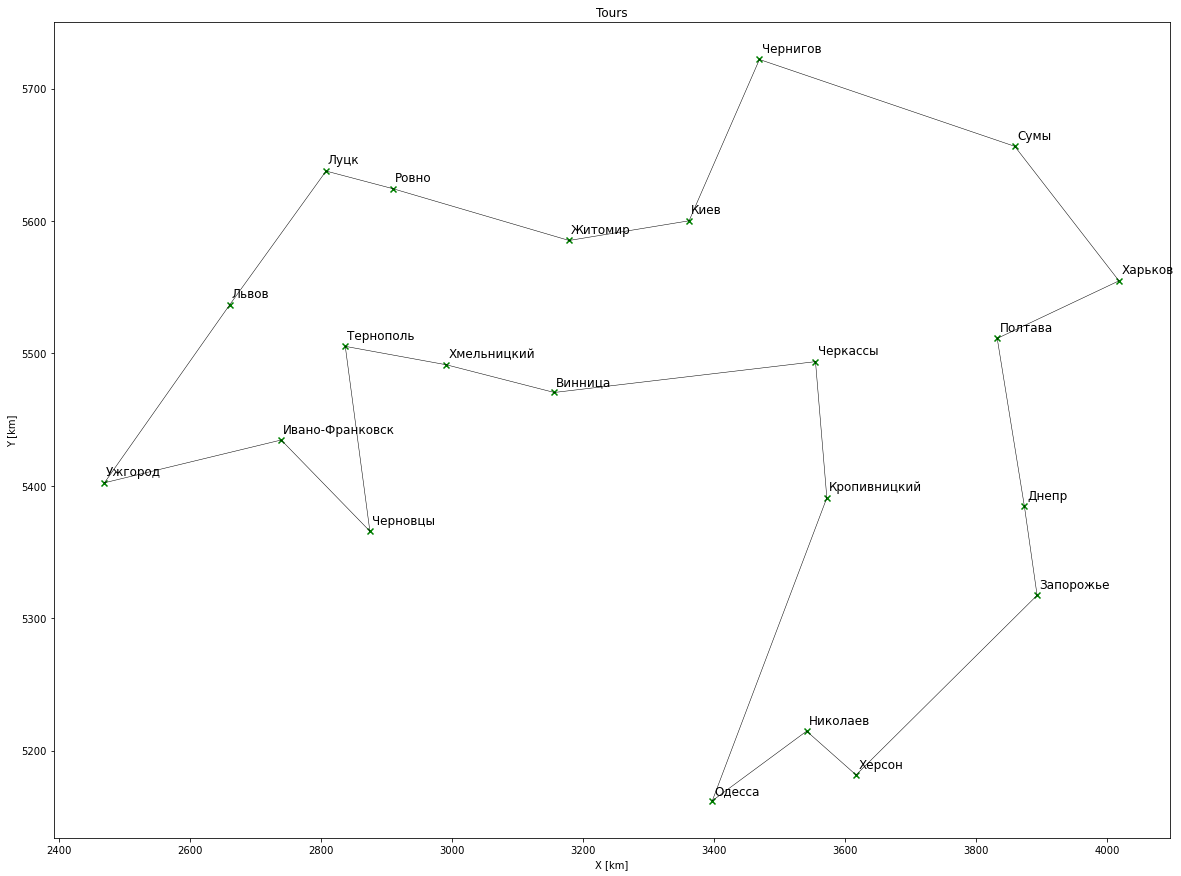

In [65]:
# Visualize the shortest route
import pandas as pd
# locations, geographical coordinates in degrees
# convert to radians
Pi = np.pi
#latitude = Pi/180*latitude
#longitude = Pi/180*longitude
# https://en.wikipedia.org/wiki/Spherical_coordinate_system
theta = longitude # polar angle
phi = latitude-Pi/2 # azimuthal angle
R = 40000/(2*Pi) # radius of Earth 
import math
#X = R*np.sin(theta)*np.cos(phi) # x-coordinates in km
#Y = R*np.sin(theta)*np.sin(phi) # y-coordinates in km
#Z = R*np.cos(theta) # z-coordinates in km
X = 40000/360*longitude
Y = 40000/360*latitude

#,'Николаев','Одесса','Полтава','Ровно','Севастополь','Симферополь','Сумы','Тернополь','Ужгород','Харьков','Херсон','Хмельницкий','Черкассы','Чернигов','Черновцы'
# 'Донецк','Луганск',

def plot_tours(cityNames, r):
    tours = [[r[i], r[i+1]] for i in range(N)]
    plt.figure(1, figsize=(20,15))
    for s, tour in enumerate(tours):
        plt.plot([ X[tour[0]], X[tour[1]] ], [ Y[tour[0]], Y[tour[1]] ], color = "black", linewidth=0.5) # line
        plt.scatter(X[tour[1]], Y[tour[1]], marker = 'x', color = 'g', label = cityNames[tour[1]]) # dot
        plt.text(X[tour[1]]*1.001, Y[tour[1]]*1.001, cityNames[tour[1]], fontsize=12)
    #plt.scatter(0,0, marker = "o", color = 'b', label = "factory")
    plt.xlabel("X [km]"), plt.ylabel("Y [km]"), plt.title("Tours") #, plt.legend(loc = 1)
    plt.show()

plot_tours(cityNames, r)

### Nearest-neighbour path
The rule that one first should go from the starting point to the closest point, then to the point closest to this, etc., in general does not yield the shortest route.

In [9]:
nn()

r_nn = [0, 18, 14, 4, 8, 7, 12, 2, 5, 20, 13, 11, 16, 1, 3, 6, 19, 9, 17, 10, 21, 15, 0]
d_nn = 4831.1


### swap2first

d = 12713.0 ; r = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0]
2<->1; dc=-1064.6; d = 11648.4
3<->2; dc=-90.00000000000011; d = 11558.4
12<->3; dc=-284.4000000000001; d = 11274.0
1<->12; dc=-97.0; d = 11177.0
4<->1; dc=-647.0; d = 10530.0
7<->4; dc=-205.39999999999998; d = 10324.6
12<->7; dc=-39.0; d = 10285.6
6<->2; dc=-384.0; d = 9901.6
2<->7; dc=-52.59999999999991; d = 9849.0
5<->12; dc=-59.39999999999998; d = 9789.6
2<->5; dc=-229.0; d = 9560.6
18<->2; dc=-15.0; d = 9545.6
16<->18; dc=-6.0; d = 9539.6
5<->16; dc=-356.0; d = 9183.6
1<->5; dc=-341.0; d = 8842.6
16<->1; dc=-20.0; d = 8822.6
6<->16; dc=-232.0; d = 8590.6
11<->6; dc=-15.0; d = 8575.6
1<->11; dc=-81.0; d = 8494.6
6<->1; dc=-263.6; d = 8231.0
13<->6; dc=-134.0; d = 8097.0
5<->13; dc=-101.0; d = 7996.0
17<->5; dc=-358.0; d = 7638.0
10<->17; dc=-188.9000000000001; d = 7449.1
9<->10; dc=-1.099999999999909; d = 7448.0
1<->9; dc=-75.30000000000007; d = 7372.7
6<->1; dc=-143.60000000000002; 

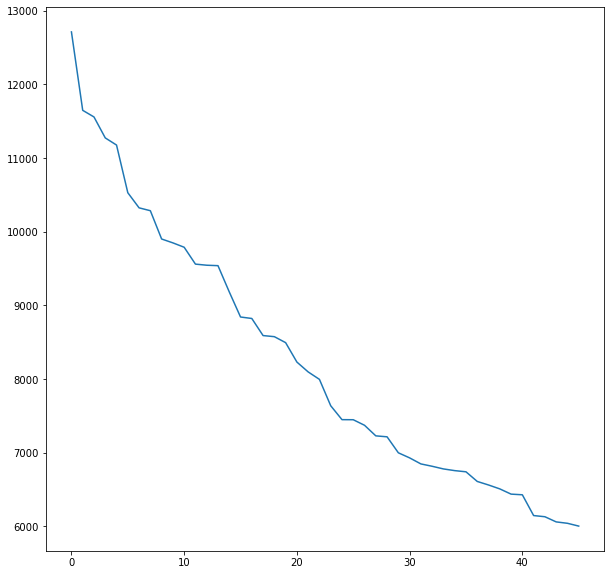

In [10]:
init(); dm_swap2first=[d_min]; i_swap2first=[0]; j_swap2first=[0]; dc_swap2first=[0];
while swap2first():
    dm_swap2first.append(d_min)
    i_swap2first.append(i_opt)
    j_swap2first.append(j_opt)
    dc_swap2first.append(dc_min)
d_swap2first = d_min
r_swap2first = r
print("dm_swap2first =",dm_swap2first)
print("r_swap2first =",r)
print("i_swap2first =",i_swap2first)
print("j_swap2first =",j_swap2first)
print("dc_swap2first =",dc_swap2first)
plt.figure(1, figsize=(10,10))
plt.plot(dm_swap2first)
ver(r)

### swap2best

d = 12713.0 ; r = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0]
3<->12; dc=-1883.0; d = 12713.0
1<->18; dc=-1337.0; d = 10830.0
11<->17; dc=-878.0; d = 9493.0
5<->21; dc=-699.0; d = 8615.0
6<->15; dc=-1083.0; d = 7916.0
9<->14; dc=-735.0; d = 6833.0
13<->1; dc=-583.6; d = 6098.0
4<->7; dc=-182.39999999999998; d = 5514.4
21<->8; dc=-255.0; d = 5332.0
16<->11; dc=-130.0; d = 5077.0
3<->9; dc=-115.89999999999998; d = 4947.0
1<->6; dc=-222.0; d = 4831.1
2<->14; dc=-24.0; d = 4609.1
17<->9; dc=-8.0; d = 4585.1
dm_swap2best = [12713.0, 10830.0, 9493.0, 8615.0, 7916.0, 6833.0, 6098.0, 5514.4, 5332.0, 5077.0, 4947.0, 4831.1, 4609.1, 4585.1, 4577.1]
r_swap2best = [0, 18, 14, 12, 7, 8, 15, 4, 21, 2, 10, 9, 17, 6, 3, 1, 11, 16, 13, 19, 20, 5, 0]
i_swap2best = [0, 3, 1, 11, 5, 6, 9, 13, 4, 5, 16, 12, 13, 2, 11]
j_swap2best = [0, 12, 18, 17, 21, 15, 14, 18, 7, 8, 17, 14, 15, 9, 12]
dc_swap2best = [0, -1883.0, -1337.0, -878.0, -699.0, -1083.0, -735.0, -583.6, -182

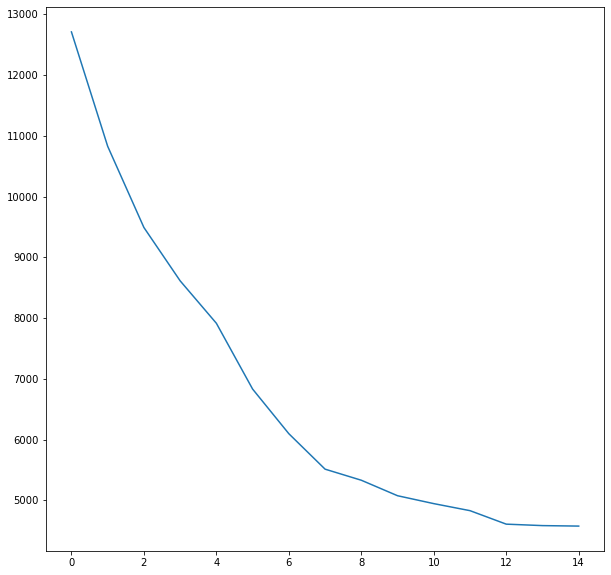

In [11]:
init(); dm_swap2best=[d_min]; i_swap2best=[0]; j_swap2best=[0]; dc_swap2best=[0];
while swap2best():
    dm_swap2best.append(d_min)
    i_swap2best.append(i_opt)
    j_swap2best.append(j_opt)
    dc_swap2best.append(dc_min)
d_swap2best = d_min
r_swap2best = r
print("dm_swap2best =",dm_swap2best)
print("r_swap2best =",r)
print("i_swap2best =",i_swap2best)
print("j_swap2best =",j_swap2best)
print("dc_swap2best =",dc_swap2best)
plt.figure(1, figsize=(10,10))
plt.plot(dm_swap2best)
ver(r)

### swap3first

d = 12713.0 ; r = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0]
1,2,3<->3,1,2; dc=-1154.6; d = 11558.4
6,12,16<->12,16,6; dc=-2228.4; d = 9330.0
5,15,18<->15,18,5; dc=-1166.0; d = 8164.0
9,5,21<->21,9,5; dc=-882.9000000000001; d = 7281.1
2,21,14<->21,14,2; dc=-467.0; d = 6814.1
10,18,6<->18,6,10; dc=-382.0; d = 6432.1
11,2,5<->5,11,2; dc=-471.0; d = 5961.1
12,7,8<->8,12,7; dc=-135.0; d = 5826.1
10,17,9<->9,10,17; dc=-3.1000000000000227; d = 5823.0
9,10,17<->17,9,10; dc=-25.899999999999977; d = 5797.1
16,6,20<->20,16,6; dc=-62.0; d = 5735.1
1,17,19<->19,1,17; dc=-159.5; d = 5575.6
3,11,16<->11,16,3; dc=-130.5999999999999; d = 5445.0
11,5,20<->5,20,11; dc=-91.0; d = 5354.0
11,13,16<->13,16,11; dc=-175.0; d = 5179.0
19,18,2<->18,2,19; dc=-351.0; d = 4828.0
5,14,2<->14,2,5; dc=-431.0; d = 4397.0
14,18,21<->18,21,14; dc=-61.0; d = 4336.0
9,10,17<->17,9,10; dc=-57.89999999999998; d = 4278.1
14,4,8<->4,8,14; dc=-27.0; d = 4251.1
dm_swap3first = [12713.0, 11

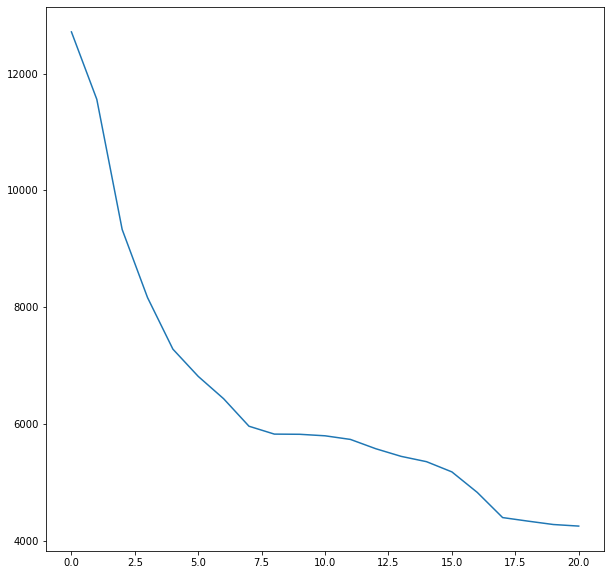

In [12]:
init(); dm_swap3first=[d_min]; i_swap3first=[0]; j_swap3first=[0]; k_swap3first=[0]; dc_swap3first=[0];
while swap3first():
    dm_swap3first.append(d_min)
    i_swap3first.append(i_opt)
    j_swap3first.append(j_opt)
    k_swap3first.append(k_opt)
    dc_swap3first.append(dc_min)
d_swap3first = d_min
r_swap3first = r
print("dm_swap3first =",dm_swap3first)
print("r_swap3first =",r)
print("i_swap3first =",i_swap3first)
print("j_swap3first =",j_swap3first)
print("k_swap3first =",k_swap3first)
print("dc_swap3first =",dc_swap3first)
plt.figure(1, figsize=(10,10))
plt.plot(dm_swap3first)
ver(r)

### swap3best

d = 12713.0 ; r = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0]
3,12,16<->12,16,3; dc=-2509.0; d = 10204.0
1,10,18<->18,1,10; dc=-1540.0; d = 8664.0
12,6,15<->15,12,6; dc=-807.4000000000001; d = 7856.6
5,14,19<->14,19,5; dc=-1588.0; d = 6268.6
2,8,21<->8,21,2; dc=-838.0; d = 5430.6
9,3,17<->3,17,9; dc=-396.5; d = 5034.1
14,12,21<->21,14,12; dc=-200.0; d = 4834.1
3,11,19<->19,3,11; dc=-99.0; d = 4735.1
dm_swap3best = [12713.0, 10204.0, 8664.0, 7856.6, 6268.6, 5430.6, 5034.1, 4834.1, 4735.1]
r_swap3best = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 1, 3, 16, 13, 11, 6, 17, 9, 10, 5, 20, 2, 0]
i_swap3best = [0, 3, 1, 3, 5, 2, 9, 5, 9]
j_swap3best = [0, 12, 10, 6, 14, 8, 16, 6, 11]
k_swap3best = [0, 16, 18, 15, 19, 21, 17, 8, 14]
dc_swap3best = [0, -2509.0, -1540.0, -807.4000000000001, -1588.0, -838.0, -396.5, -200.0, -99.0]
Verification is successful:
r = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 1, 3, 16, 13, 11, 6, 17, 9, 10, 5, 20, 2, 0]
Distance = 4735.1


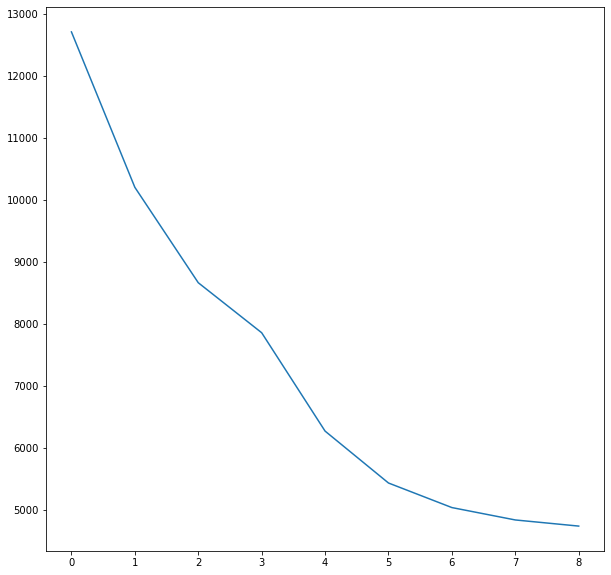

In [13]:
init(); dm_swap3best=[d_min]; i_swap3best=[0]; j_swap3best=[0]; k_swap3best=[0]; dc_swap3best=[0];
while swap3best():
    dm_swap3best.append(d_min)
    i_swap3best.append(i_opt)
    j_swap3best.append(j_opt)
    k_swap3best.append(k_opt)
    dc_swap3best.append(dc_min)
d_swap3best = d_min
r_swap3best = r
print("dm_swap3best =",dm_swap3best)
print("r_swap3best =",r)
print("i_swap3best =",i_swap3best)
print("j_swap3best =",j_swap3best)
print("k_swap3best =",k_swap3best)
print("dc_swap3best =",dc_swap3best)
plt.figure(1, figsize=(10,10))
plt.plot(dm_swap3best)
ver(r)

### NN + swap2first

21<->14; dc=-31.0; d = 4800.1
15<->18; dc=-23.0; d = 4777.1
21<->15; dc=-139.0; d = 4638.1
4<->15; dc=-136.0; d = 4502.1
16<->11; dc=-43.0; d = 4459.1
19<->6; dc=-89.0; d = 4370.1
17<->9; dc=-8.0; d = 4362.1
dm_nn_swap2first = [4831.1, 4800.1, 4777.1, 4638.1, 4502.1, 4459.1, 4370.1, 4362.1]
r_nn_swap2first = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_swap2first = [0, 2, 1, 1, 2, 11, 15, 17]
j_nn_swap2first = [0, 20, 21, 2, 3, 12, 16, 18]
dc_nn_swap2first = [0, -31.0, -23.0, -139.0, -136.0, -43.0, -89.0, -8.0]
Verification is successful:
r = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
Distance = 4362.1


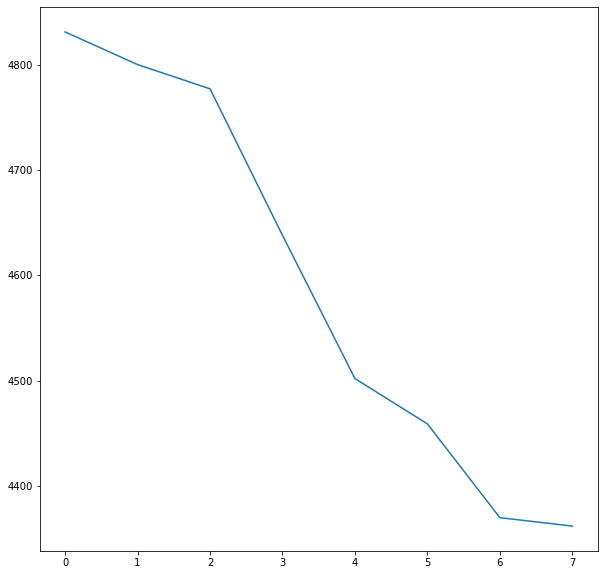

In [32]:
r = r_nn[:]; d_min=d_nn; dm_nn_swap2first=[d_nn]; i_nn_swap2first=[0]; j_nn_swap2first=[0]; dc_nn_swap2first=[0];
while swap2first():
    dm_nn_swap2first.append(d_min)
    i_nn_swap2first.append(i_opt)
    j_nn_swap2first.append(j_opt)
    dc_nn_swap2first.append(dc_min)
d_nn_swap2first = d_min
r_nn_swap2first = r
print("dm_nn_swap2first =",dm_nn_swap2first)
print("r_nn_swap2first =",r)
print("i_nn_swap2first =",i_nn_swap2first)
print("j_nn_swap2first =",j_nn_swap2first)
print("dc_nn_swap2first =",dc_nn_swap2first)
ver(r)
plt.figure(1, figsize=(10,10))
plt.plot(dm_nn_swap2first)

### NN + swap2best

4<->15; dc=-131.0; d = 4831.1
6<->19; dc=-89.0; d = 4700.1
11<->16; dc=-43.0; d = 4611.1
14<->4; dc=-31.0; d = 4568.1
18<->21; dc=-122.0; d = 4537.1
18<->14; dc=-45.0; d = 4415.1
9<->17; dc=-8.0; d = 4370.1
dm_nn_swap2best = [4831.1, 4700.1, 4611.1, 4568.1, 4537.1, 4415.1, 4370.1, 4362.1]
r_nn_swap2best = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_swap2best = [0, 3, 15, 11, 2, 1, 20, 17]
j_nn_swap2best = [0, 21, 16, 12, 21, 20, 21, 18]
dc_nn_swap2best = [0, -131.0, -89.0, -43.0, -31.0, -122.0, -45.0, -8.0]
Verification is successful:
r = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
Distance = 4362.1


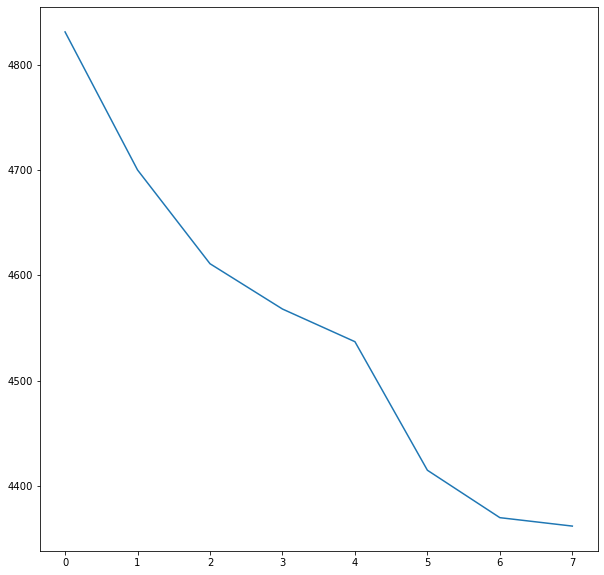

In [31]:
r = r_nn[:]; d_min=d_nn; dm_nn_swap2best=[d_nn]; i_nn_swap2best=[0]; j_nn_swap2best=[0]; dc_nn_swap2best=[0];
while swap2best():
    dm_nn_swap2best.append(d_min)
    i_nn_swap2best.append(i_opt)
    j_nn_swap2best.append(j_opt)
    dc_nn_swap2best.append(dc_min)
d_nn_swap2best = d_min
r_nn_swap2best = r
print("dm_nn_swap2best =",dm_nn_swap2best)
print("r_nn_swap2best =",r)
print("i_nn_swap2best =",i_nn_swap2best)
print("j_nn_swap2best =",j_nn_swap2best)
print("dc_nn_swap2best =",dc_nn_swap2best)
ver(r)
plt.figure(1, figsize=(10,10))
plt.plot(dm_nn_swap2best)

### NN + swap3first

18,14,15<->14,15,18; dc=-163.0; d = 4668.1
15,4,8<->4,8,15; dc=-1.0; d = 4667.1
14,21,18<->21,18,14; dc=-35.0; d = 4632.1
dm_nn_swap3first = [4831.1, 4668.1, 4667.1, 4632.1]
r_nn_swap3first = [0, 21, 4, 8, 15, 7, 12, 2, 5, 20, 13, 11, 16, 1, 3, 6, 19, 9, 17, 10, 18, 14, 0]
i_nn_swap3first = [0, 1, 2, 1]
j_nn_swap3first = [0, 2, 3, 20]
k_nn_swap3first = [0, 21, 4, 21]
dc_nn_swap3first = [0, -163.0, -1.0, -35.0]
Verification is successful:
r = [0, 21, 4, 8, 15, 7, 12, 2, 5, 20, 13, 11, 16, 1, 3, 6, 19, 9, 17, 10, 18, 14, 0]
Distance = 4632.1


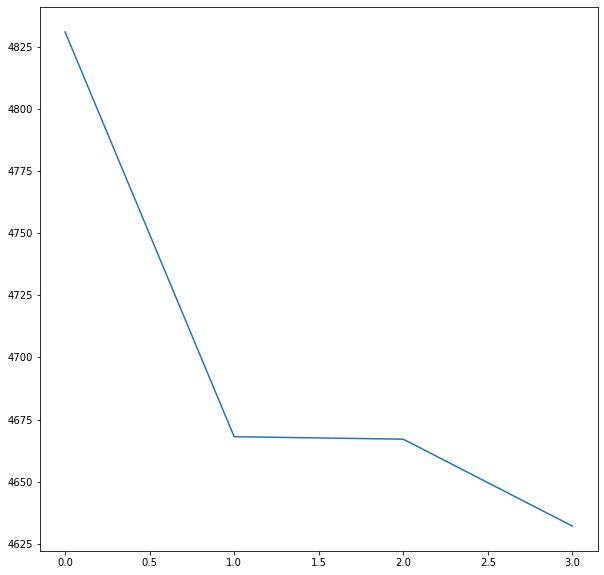

In [19]:
r = r_nn[:]; d_min=d_nn; dm_nn_swap3first=[d_nn]; i_nn_swap3first=[0]; j_nn_swap3first=[0]; k_nn_swap3first=[0]; dc_nn_swap3first=[0];
while swap3first():
    dm_nn_swap3first.append(d_min)
    i_nn_swap3first.append(i_opt)
    j_nn_swap3first.append(j_opt)
    k_nn_swap3first.append(k_opt)
    dc_nn_swap3first.append(dc_min)
d_nn_swap3first = d_min
r_nn_swap3first = r
print("dm_nn_swap3first =",dm_nn_swap3first)
print("r_nn_swap3first =",r)
print("i_nn_swap3first =",i_nn_swap3first)
print("j_nn_swap3first =",j_nn_swap3first)
print("k_nn_swap3first =",k_nn_swap3first)
print("dc_nn_swap3first =",dc_nn_swap3first)
ver(r)
plt.figure(1, figsize=(10,10))
plt.plot(dm_nn_swap3first)

### NN + swap3best

18,14,15<->14,15,18; dc=-163.0; d = 4668.1
15,4,8<->4,8,15; dc=-1.0; d = 4667.1
14,21,18<->21,18,14; dc=-35.0; d = 4632.1
dm_nn_swap3best = [4831.1, 4668.1, 4667.1, 4632.1]
r_nn_swap3best = [0, 21, 4, 8, 15, 7, 12, 2, 5, 20, 13, 11, 16, 1, 3, 6, 19, 9, 17, 10, 18, 14, 0]
i_nn_swap3best = [0, 1, 2, 1]
j_nn_swap3best = [0, 2, 3, 20]
k_nn_swap3best = [0, 21, 4, 21]
dc_nn_swap3best = [0, -163.0, -1.0, -35.0]
Verification is successful:
r = [0, 21, 4, 8, 15, 7, 12, 2, 5, 20, 13, 11, 16, 1, 3, 6, 19, 9, 17, 10, 18, 14, 0]
Distance = 4632.1


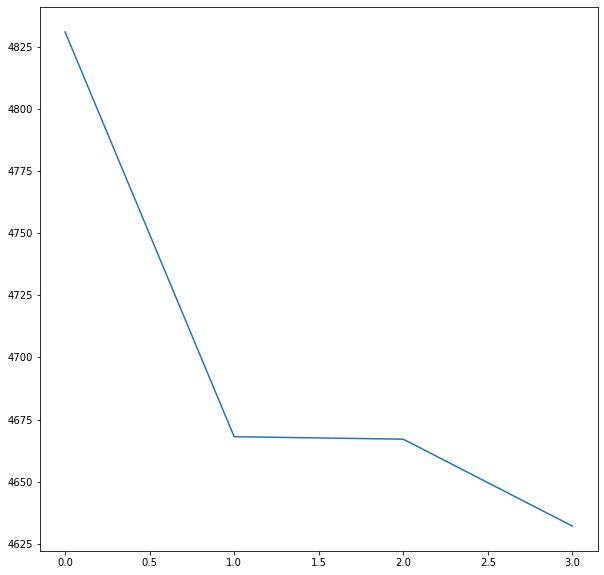

In [20]:
r = r_nn[:]; d_min=d_nn; dm_nn_swap3best=[d_nn]; i_nn_swap3best=[0]; j_nn_swap3best=[0]; k_nn_swap3best=[0]; dc_nn_swap3best=[0];
while swap3best():
    dm_nn_swap3best.append(d_min)
    i_nn_swap3best.append(i_opt)
    j_nn_swap3best.append(j_opt)
    k_nn_swap3best.append(k_opt)
    dc_nn_swap3best.append(dc_min)
d_nn_swap3best = d_min
r_nn_swap3best = r
print("dm_nn_swap3best =",dm_nn_swap3best)
print("r_nn_swap3best =",r)
print("i_nn_swap3best =",i_nn_swap3best)
print("j_nn_swap3best =",j_nn_swap3best)
print("k_nn_swap3best =",k_nn_swap3best)
print("dc_nn_swap3best =",dc_nn_swap3best)
ver(r)
plt.figure(1, figsize=(10,10))
plt.plot(dm_nn_swap3best)

### swap2first + swap3first

8,14,18<->14,18,8; dc=-82.0; d = 5922.099999999999
12,2,19<->19,12,2; dc=-48.59999999999991; d = 5873.5
7,12,5<->5,7,12; dc=-98.40000000000009; d = 5775.1
14,7,20<->20,14,7; dc=-302.0; d = 5473.1
19,18,2<->2,19,18; dc=-220.0; d = 5253.1
6,2,20<->2,20,6; dc=-143.0; d = 5110.1
14,12,7<->12,7,14; dc=-61.0; d = 5049.1
19,17,1<->17,1,19; dc=-58.09999999999991; d = 4991.0
17,10,9<->10,9,17; dc=-57.89999999999998; d = 4933.1
2,6,19<->19,2,6; dc=-62.0; d = 4871.1
dm_swap2first_swap3first = [6004.099999999999, 5922.099999999999, 5873.5, 5775.1, 5473.1, 5253.1, 5110.1, 5049.1, 4991.0, 4933.1, 4871.1]
r_swap2first_swap3first = [0, 19, 11, 16, 13, 20, 5, 2, 10, 9, 17, 1, 3, 6, 21, 4, 15, 8, 12, 7, 14, 18, 0]
i_swap2first_swap3first = [0, 7, 5, 6, 7, 5, 1, 18, 8, 8, 1]
j_swap2first_swap3first = [0, 8, 18, 18, 18, 8, 5, 19, 11, 9, 7]
k_swap2first_swap3first = [0, 17, 21, 19, 20, 21, 7, 20, 13, 10, 13]
dc_swap2first_swap3first = [0, -82.0, -48.59999999999991, -98.40000000000009, -302.0, -220.0, -143.

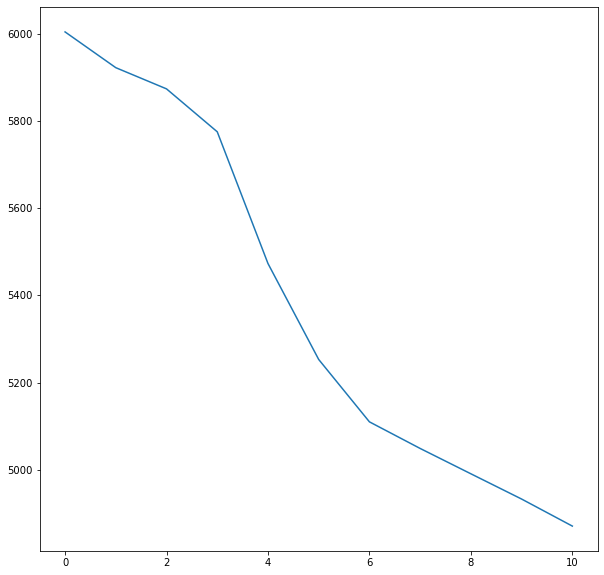

In [21]:
r = r_swap2first[:]; d_min=d_swap2first; dm_swap2first_swap3first=[d_swap2first]; i_swap2first_swap3first=[0]; j_swap2first_swap3first=[0]; k_swap2first_swap3first=[0]; dc_swap2first_swap3first=[0];
while swap3first():
    dm_swap2first_swap3first.append(d_min)
    i_swap2first_swap3first.append(i_opt)
    j_swap2first_swap3first.append(j_opt)
    k_swap2first_swap3first.append(k_opt)
    dc_swap2first_swap3first.append(dc_min)
d_swap2first_swap3first = d_min
r_swap2first_swap3first = r
print("dm_swap2first_swap3first =",dm_swap2first_swap3first)
print("r_swap2first_swap3first =",r)
print("i_swap2first_swap3first =",i_swap2first_swap3first)
print("j_swap2first_swap3first =",j_swap2first_swap3first)
print("k_swap2first_swap3first =",k_swap2first_swap3first)
print("dc_swap2first_swap3first =",dc_swap2first_swap3first)
ver(r)
plt.figure(1, figsize=(10,10))
plt.plot(dm_swap2first_swap3first)

### swap2first + swap3best

8,14,18<->14,18,8; dc=-82.0; d = 5922.099999999999
12,2,19<->19,12,2; dc=-48.59999999999991; d = 5873.5
7,12,5<->5,7,12; dc=-98.40000000000009; d = 5775.1
14,7,20<->20,14,7; dc=-302.0; d = 5473.1
6,18,2<->2,6,18; dc=-255.0; d = 5218.1
19,5,20<->5,20,19; dc=-150.0; d = 5068.1
11,13,5<->5,11,13; dc=-108.0; d = 4960.1
16,13,20<->20,16,13; dc=-168.0; d = 4792.1
11,16,13<->13,11,16; dc=-62.0; d = 4730.1
14,12,7<->12,7,14; dc=-61.0; d = 4669.1
dm_swap2first_swap3best = [6004.099999999999, 5922.099999999999, 5873.5, 5775.1, 5473.1, 5218.1, 5068.1, 4960.1, 4792.1, 4730.1, 4669.1]
r_swap2first_swap3best = [0, 2, 5, 20, 13, 11, 16, 19, 6, 10, 9, 17, 3, 1, 21, 4, 15, 8, 12, 7, 14, 18, 0]
i_swap2first_swap3best = [0, 7, 5, 6, 7, 1, 5, 2, 3, 4, 18]
j_swap2first_swap3best = [0, 8, 18, 18, 18, 8, 6, 4, 5, 5, 19]
k_swap2first_swap3best = [0, 17, 21, 19, 20, 21, 7, 5, 6, 6, 20]
dc_swap2first_swap3best = [0, -82.0, -48.59999999999991, -98.40000000000009, -302.0, -255.0, -150.0, -108.0, -168.0, -62.0, -6

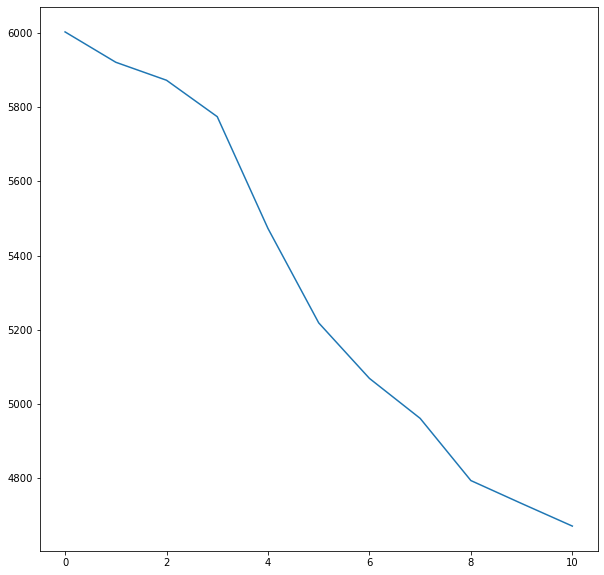

In [22]:
r = r_swap2first[:]; d_min=d_swap2first; dm_swap2first_swap3best=[d_swap2first]; i_swap2first_swap3best=[0]; j_swap2first_swap3best=[0]; k_swap2first_swap3best=[0]; dc_swap2first_swap3best=[0];
while swap3best():
    dm_swap2first_swap3best.append(d_min)
    i_swap2first_swap3best.append(i_opt);
    j_swap2first_swap3best.append(j_opt);
    k_swap2first_swap3best.append(k_opt);
    dc_swap2first_swap3best.append(dc_min)
d_swap2first_swap3best = d_min
r_swap2first_swap3best = r
print("dm_swap2first_swap3best =",dm_swap2first_swap3best)
print("r_swap2first_swap3best =",r)
print("i_swap2first_swap3best =",i_swap2first_swap3best)
print("j_swap2first_swap3best =",j_swap2first_swap3best)
print("k_swap2first_swap3best =",k_swap2first_swap3best)
print("dc_swap2first_swap3best =",dc_swap2first_swap3best)
ver(r)
plt.figure(1, figsize=(10,10))
plt.plot(dm_swap2first_swap3best)

### swap2best + swap3first

19,20,5<->20,5,19; dc=-66.0; d = 4511.1
2,6,19<->6,19,2; dc=-73.0; d = 4438.1
6,10,17<->10,17,6; dc=-198.0; d = 4240.1
dm_swap2best_swap3first = [4577.1, 4511.1, 4438.1, 4240.1]
r_swap2best_swap3first = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 17, 9, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
i_swap2best_swap3first = [0, 19, 9, 9]
j_swap2best_swap3first = [0, 20, 13, 10]
k_swap2best_swap3first = [0, 21, 21, 12]
dc_swap2best_swap3first = [0, -66.0, -73.0, -198.0]
Verification is successful:
r = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 17, 9, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
Distance = 4240.1


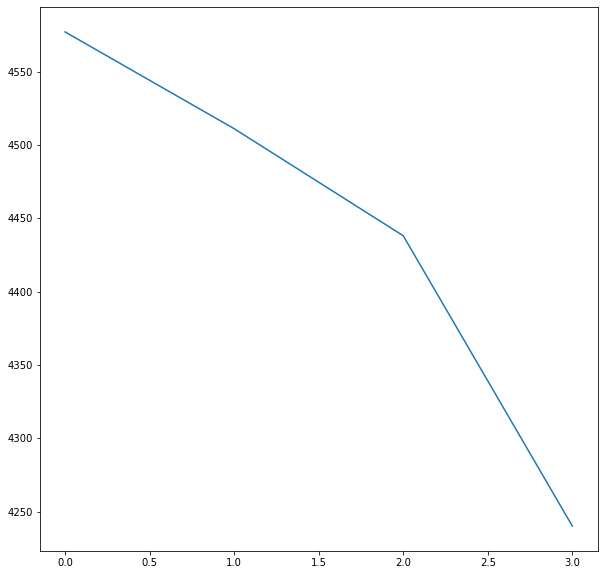

In [24]:
r = r_swap2best[:]; d_min=d_swap2best; dm_swap2best_swap3first=[d_swap2best]; i_swap2best_swap3first=[0]; j_swap2best_swap3first=[0]; k_swap2best_swap3first=[0]; dc_swap2best_swap3first=[0];
while swap3first():
    dm_swap2best_swap3first.append(d_min)
    i_swap2best_swap3first.append(i_opt)
    j_swap2best_swap3first.append(j_opt)
    k_swap2best_swap3first.append(k_opt)
    dc_swap2best_swap3first.append(dc_min)
d_swap2best_swap3first = d_min
r_swap2best_swap3first = r
print("dm_swap2best_swap3first =",dm_swap2best_swap3first)
print("r_swap2best_swap3first =",r)
print("i_swap2best_swap3first =",i_swap2best_swap3first)
print("j_swap2best_swap3first =",j_swap2best_swap3first)
print("k_swap2best_swap3first =",k_swap2best_swap3first)
print("dc_swap2best_swap3first =",dc_swap2best_swap3first)
ver(r)
plt.figure(1, figsize=(10,10))
plt.plot(dm_swap2best_swap3first)

### swap2best + swap3best

19,20,5<->20,5,19; dc=-66.0; d = 4511.1
2,6,19<->6,19,2; dc=-73.0; d = 4438.1
6,10,17<->10,17,6; dc=-198.0; d = 4240.1
dm_swap2best_swap3best = [4577.1, 4511.1, 4438.1, 4240.1]
r_swap2best_swap3best = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 17, 9, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
i_swap2best_swap3best = [0, 19, 9, 9]
j_swap2best_swap3best = [0, 20, 13, 10]
k_swap2best_swap3best = [0, 21, 21, 12]
dc_swap2best_swap3best = [0, -66.0, -73.0, -198.0]
Verification is successful:
r = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 17, 9, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
Distance = 4240.1


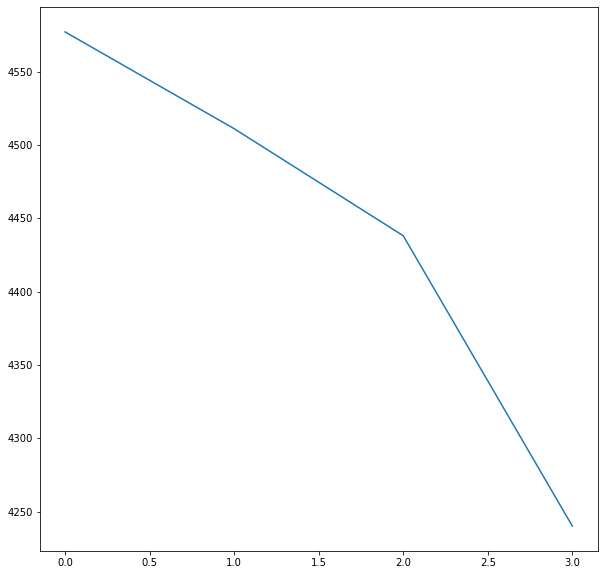

In [25]:
r = r_swap2best[:]; d_min=d_swap2best; dm_swap2best_swap3best=[d_swap2best]; i_swap2best_swap3best=[0]; j_swap2best_swap3best=[0]; k_swap2best_swap3best=[0]; dc_swap2best_swap3best=[0];
while swap3best():
    dm_swap2best_swap3best.append(d_min)
    i_swap2best_swap3best.append(i_opt);
    j_swap2best_swap3best.append(j_opt);
    k_swap2best_swap3best.append(k_opt);
    dc_swap2best_swap3best.append(dc_min)
d_swap2best_swap3best = d_min
r_swap2best_swap3best = r
print("dm_swap2best_swap3best =",dm_swap2best_swap3best)
print("r_swap2best_swap3best =",r)
print("i_swap2best_swap3best =",i_swap2best_swap3best)
print("j_swap2best_swap3best =",j_swap2best_swap3best)
print("k_swap2best_swap3best =",k_swap2best_swap3best)
print("dc_swap2best_swap3best =",dc_swap2best_swap3best)
ver(r)
plt.figure(1, figsize=(10,10))
plt.plot(dm_swap2best_swap3best)

### swap3first + swap2first

15<->8; dc=-57.0; d = 4194.1
7<->12; dc=-65.0; d = 4129.1
1<->3; dc=-115.0; d = 4014.1000000000004
dm_swap3first_swap2first = [4251.1, 4194.1, 4129.1, 4014.1000000000004]
r_swap3first_swap2first = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
i_swap3first_swap2first = [0, 4, 7, 15]
j_swap3first_swap2first = [0, 5, 8, 16]
dc_swap3first_swap2first = [0, -57.0, -65.0, -115.0]
Verification is successful:
r = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
Distance = 4014.1


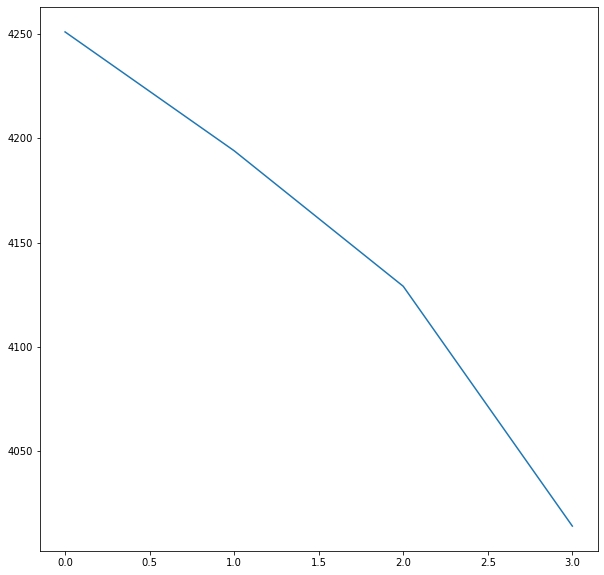

In [27]:
r = r_swap3first[:]; d_min=d_swap3first; dm_swap3first_swap2first=[d_swap3first]; i_swap3first_swap2first=[0]; j_swap3first_swap2first=[0]; dc_swap3first_swap2first=[0];
while swap2first():
    dm_swap3first_swap2first.append(d_min)
    i_swap3first_swap2first.append(i_opt)
    j_swap3first_swap2first.append(j_opt)
    dc_swap3first_swap2first.append(dc_min)
d_swap3first_swap2first = d_min
r_swap3first_swap2first = r
print("dm_swap3first_swap2first =",dm_swap3first_swap2first)
print("r_swap3first_swap2first =",r)
print("i_swap3first_swap2first =",i_swap3first_swap2first)
print("j_swap3first_swap2first =",j_swap3first_swap2first)
print("dc_swap3first_swap2first =",dc_swap3first_swap2first)
ver(r)
plt.figure(1, figsize=(10,10))
plt.plot(dm_swap3first_swap2first)

### swap3first + swap2best

3<->1; dc=-115.0; d = 4251.1
12<->7; dc=-65.0; d = 4136.1
8<->15; dc=-57.0; d = 4071.1000000000004
dm_swap3first_swap2best = [4251.1, 4136.1, 4071.1000000000004, 4014.1000000000004]
r_swap3first_swap2best = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
i_swap3first_swap2best = [0, 15, 7, 4]
j_swap3first_swap2best = [0, 16, 8, 5]
dc_swap3first_swap2best = [0, -115.0, -65.0, -57.0]
Verification is successful:
r = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
Distance = 4014.1


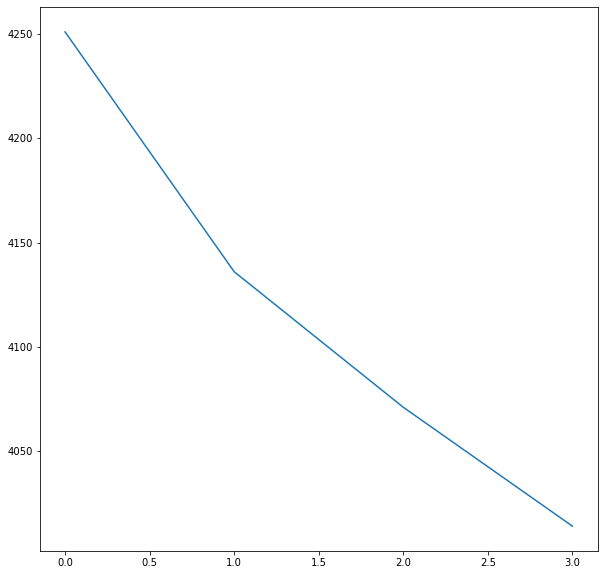

In [28]:
r = r_swap3first[:]; d_min=d_swap3first; dm_swap3first_swap2best=[d_swap3first]; i_swap3first_swap2best=[0]; j_swap3first_swap2best=[0]; dc_swap3first_swap2best=[0];
while swap2best():
    dm_swap3first_swap2best.append(d_min)
    i_swap3first_swap2best.append(i_opt)
    j_swap3first_swap2best.append(j_opt)
    dc_swap3first_swap2best.append(dc_min)
d_swap3first_swap2best = d_min
r_swap3first_swap2best = r
print("dm_swap3first_swap2best =",dm_swap3first_swap2best)
print("r_swap3first_swap2best =",r)
print("i_swap3first_swap2best =",i_swap3first_swap2best)
print("j_swap3first_swap2best =",j_swap3first_swap2best)
print("dc_swap3first_swap2best =",dc_swap3first_swap2best)
ver(r)
plt.figure(1, figsize=(10,10))
plt.plot(dm_swap3first_swap2best)

### swap3best + swap2first

3<->1; dc=-16.0; d = 4719.1
20<->5; dc=-7.0; d = 4712.1
dm_swap3best_swap2first = [4735.1, 4719.1, 4712.1]
r_swap3best_swap2first = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
i_swap3best_swap2first = [0, 10, 19]
j_swap3best_swap2first = [0, 11, 20]
dc_swap3best_swap2first = [0, -16.0, -7.0]
Verification is successful:
r = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
Distance = 4712.1


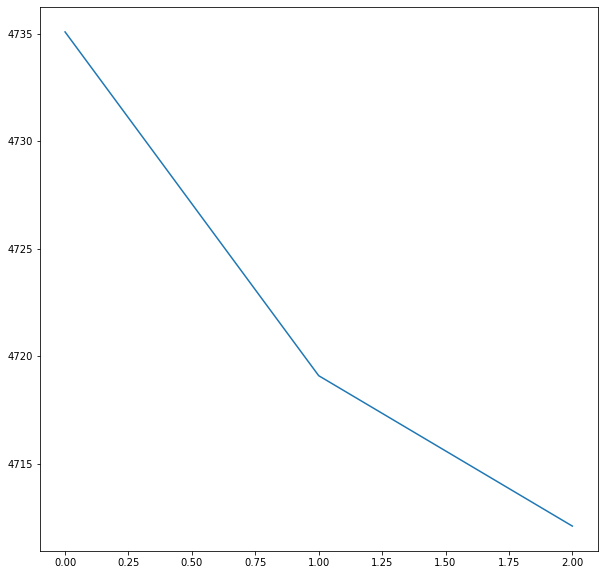

In [33]:
r = r_swap3best[:]; d_min=d_swap3best; dm_swap3best_swap2first=[d_swap3best]; i_swap3best_swap2first=[0]; j_swap3best_swap2first=[0]; dc_swap3best_swap2first=[0];
while swap2first():
    dm_swap3best_swap2first.append(d_min)
    i_swap3best_swap2first.append(i_opt)
    j_swap3best_swap2first.append(j_opt)
    dc_swap3best_swap2first.append(dc_min)
d_swap3best_swap2first = d_min
r_swap3best_swap2first = r
print("dm_swap3best_swap2first =",dm_swap3best_swap2first)
print("r_swap3best_swap2first =",r)
print("i_swap3best_swap2first =",i_swap3best_swap2first)
print("j_swap3best_swap2first =",j_swap3best_swap2first)
print("dc_swap3best_swap2first =",dc_swap3best_swap2first)
ver(r)
plt.figure(1, figsize=(10,10))
plt.plot(dm_swap3best_swap2first)

### swap3best + swap2best

1<->3; dc=-16.0; d = 4735.1
5<->20; dc=-7.0; d = 4719.1
dm_swap3best_swap2best = [4735.1, 4719.1, 4712.1]
r_swap3best_swap2best = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
i_swap3best_swap2best = [0, 10, 19]
j_swap3best_swap2best = [0, 11, 20]
dc_swap3best_swap2best = [0, -16.0, -7.0]
Verification is successful:
r = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
Distance = 4712.1


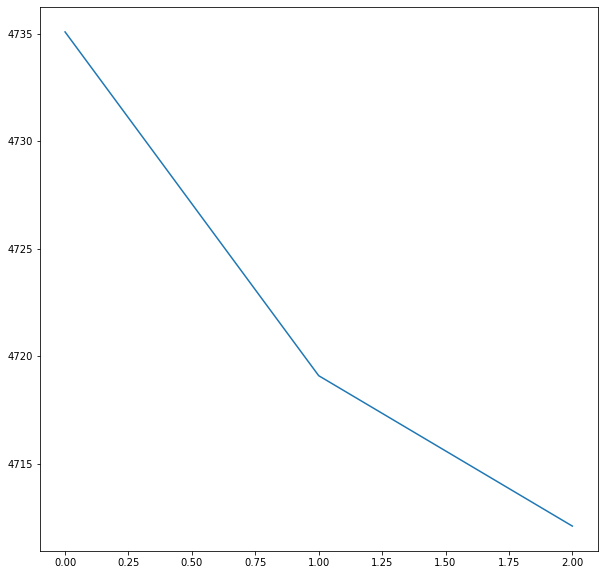

In [34]:
r = r_swap3best[:]; d_min=d_swap3best; dm_swap3best_swap2best=[d_swap3best]; i_swap3best_swap2best=[0]; j_swap3best_swap2best=[0]; dc_swap3best_swap2best=[0];
while swap2best():
    dm_swap3best_swap2best.append(d_min)
    i_swap3best_swap2best.append(i_opt)
    j_swap3best_swap2best.append(j_opt)
    dc_swap3best_swap2best.append(dc_min)
d_swap3best_swap2best = d_min
r_swap3best_swap2best = r
print("dm_swap3best_swap2best =",dm_swap3best_swap2best)
print("r_swap3best_swap2best =",r)
print("i_swap3best_swap2best =",i_swap3best_swap2best)
print("j_swap3best_swap2best =",j_swap3best_swap2best)
print("dc_swap3best_swap2best =",dc_swap3best_swap2best)
ver(r)
plt.figure(1, figsize=(10,10))
plt.plot(dm_swap3best_swap2best)

### swap2first + swap3first + swap2first

2<->19; dc=-2.0; d = 4869.1
3<->1; dc=-78.0; d = 4791.1
7<->12; dc=-39.0; d = 4752.1
dm_s2f_s3f_s2f = [4871.1, 4869.1, 4791.1, 4752.1]
r_s2f_s3f_s2f = [0, 2, 11, 16, 13, 20, 5, 19, 10, 9, 17, 3, 1, 6, 21, 4, 15, 8, 7, 12, 14, 18, 0]
i_s2f_s3f_s2f = [0, 1, 11, 18]
j_s2f_s3f_s2f = [0, 7, 12, 19]
dc_s2f_s3f_s2f = [0, -2.0, -78.0, -39.0]
Verification is successful:
r = [0, 2, 11, 16, 13, 20, 5, 19, 10, 9, 17, 3, 1, 6, 21, 4, 15, 8, 7, 12, 14, 18, 0]
Distance = 4752.1


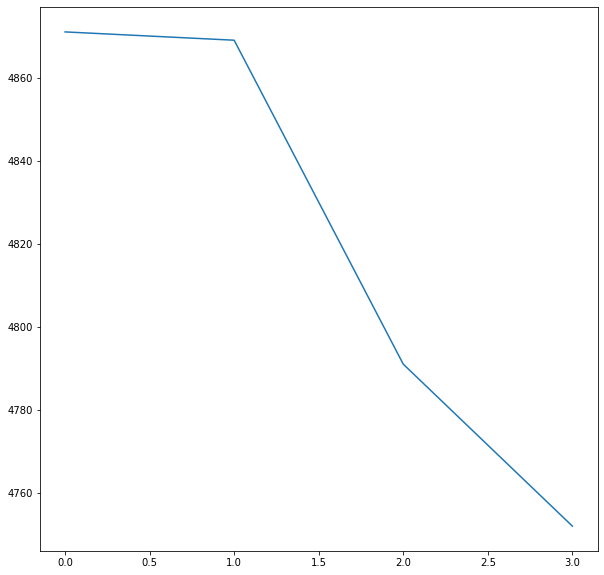

In [47]:
r = r_swap2first_swap3first[:]; d_min=d_swap2first_swap3first; dm_s2f_s3f_s2f=[d_swap2first_swap3first]; i_s2f_s3f_s2f=[0]; j_s2f_s3f_s2f=[0]; dc_s2f_s3f_s2f=[0];
while swap2first():
    dm_s2f_s3f_s2f.append(d_min)
    i_s2f_s3f_s2f.append(i_opt)
    j_s2f_s3f_s2f.append(j_opt)
    dc_s2f_s3f_s2f.append(dc_min)
d_s2f_s3f_s2f = d_min
r_s2f_s3f_s2f = r
print("dm_s2f_s3f_s2f =",dm_s2f_s3f_s2f)
print("r_s2f_s3f_s2f =",r)
print("i_s2f_s3f_s2f =",i_s2f_s3f_s2f)
print("j_s2f_s3f_s2f =",j_s2f_s3f_s2f)
print("dc_s2f_s3f_s2f =",dc_s2f_s3f_s2f)
ver(r)
plt.figure(1, figsize=(10,10))
plt.plot(dm_s2f_s3f_s2f)

### swap2first + swap3first + swap2best

1<->3; dc=-78.0; d = 4871.1
12<->7; dc=-39.0; d = 4793.1
19<->2; dc=-2.0; d = 4754.1
dm_s2f_s3f_s2b = [4871.1, 4793.1, 4754.1, 4752.1]
r_s2f_s3f_s2b = [0, 2, 11, 16, 13, 20, 5, 19, 10, 9, 17, 3, 1, 6, 21, 4, 15, 8, 7, 12, 14, 18, 0]
i_s2f_s3f_s2b = [0, 11, 18, 1]
j_s2f_s3f_s2b = [0, 12, 19, 7]
dc_s2f_s3f_s2b = [0, -78.0, -39.0, -2.0]
Verification is successful:
r = [0, 2, 11, 16, 13, 20, 5, 19, 10, 9, 17, 3, 1, 6, 21, 4, 15, 8, 7, 12, 14, 18, 0]
Distance = 4752.1


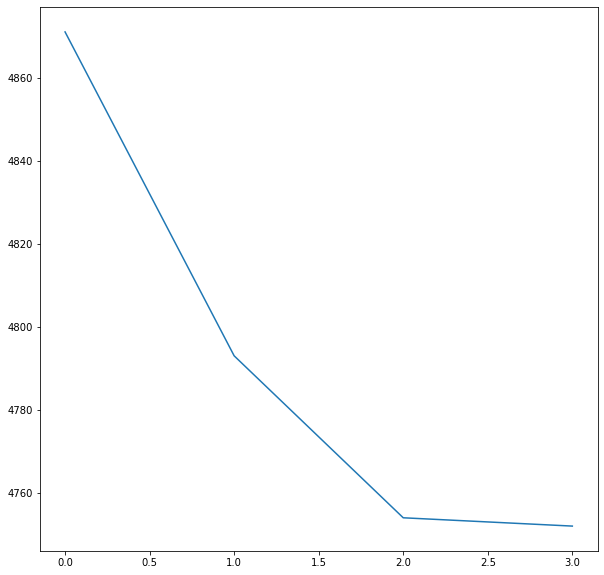

In [51]:
r = r_swap2first_swap3first[:]; d_min=d_swap2first_swap3first; dm_s2f_s3f_s2b=[d_swap2first_swap3first]; i_s2f_s3f_s2b=[0]; j_s2f_s3f_s2b=[0]; dc_s2f_s3f_s2b=[0];
while swap2best():
    dm_s2f_s3f_s2b.append(d_min)
    i_s2f_s3f_s2b.append(i_opt)
    j_s2f_s3f_s2b.append(j_opt)
    dc_s2f_s3f_s2b.append(dc_min)
d_s2f_s3f_s2b = d_min
r_s2f_s3f_s2b = r
print("dm_s2f_s3f_s2b =",dm_s2f_s3f_s2b)
print("r_s2f_s3f_s2b =",r)
print("i_s2f_s3f_s2b =",i_s2f_s3f_s2b)
print("j_s2f_s3f_s2b =",j_s2f_s3f_s2b)
print("dc_s2f_s3f_s2b =",dc_s2f_s3f_s2b)
ver(r)
plt.figure(1, figsize=(10,10))
plt.plot(dm_s2f_s3f_s2b)

### swap2first + swap3best + swap2first

16<->11; dc=-128.0; d = 4541.1
7<->12; dc=-39.0; d = 4502.1
dm_s2f_s3b_s2f = [4669.1, 4541.1, 4502.1]
r_s2f_s3b_s2f = [0, 2, 5, 20, 13, 16, 11, 19, 6, 10, 9, 17, 3, 1, 21, 4, 15, 8, 7, 12, 14, 18, 0]
i_s2f_s3b_s2f = [0, 5, 18]
j_s2f_s3b_s2f = [0, 6, 19]
dc_s2f_s3b_s2f = [0, -128.0, -39.0]
Verification is successful:
r = [0, 2, 5, 20, 13, 16, 11, 19, 6, 10, 9, 17, 3, 1, 21, 4, 15, 8, 7, 12, 14, 18, 0]
Distance = 4502.1


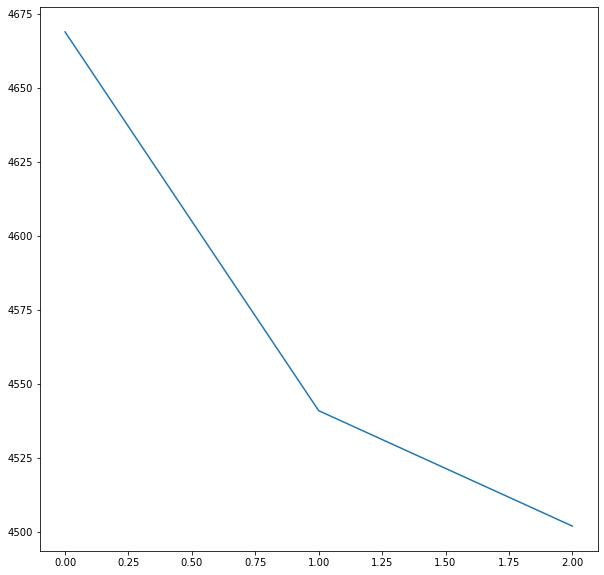

In [98]:
r = r_swap2first_swap3best[:]; d_min=d_swap2first_swap3best; dm_s2f_s3b_s2f=[d_swap2first_swap3best]; i_s2f_s3b_s2f=[0]; j_s2f_s3b_s2f=[0]; dc_s2f_s3b_s2f=[0];
while swap2first():
    dm_s2f_s3b_s2f.append(d_min)
    i_s2f_s3b_s2f.append(i_opt)
    j_s2f_s3b_s2f.append(j_opt)
    dc_s2f_s3b_s2f.append(dc_min)
d_s2f_s3b_s2f = d_min
r_s2f_s3b_s2f = r
print("dm_s2f_s3b_s2f =",dm_s2f_s3b_s2f)
print("r_s2f_s3b_s2f =",r)
print("i_s2f_s3b_s2f =",i_s2f_s3b_s2f)
print("j_s2f_s3b_s2f =",j_s2f_s3b_s2f)
print("dc_s2f_s3b_s2f =",dc_s2f_s3b_s2f)
ver(r)
plt.figure(1, figsize=(10,10))
plt.plot(dm_s2f_s3b_s2f)

### swap2first + swap3best + swap2best

11<->16; dc=-128.0; d = 4669.1
12<->7; dc=-39.0; d = 4541.1
dm_s2f_s3b_s2b = [4669.1, 4541.1, 4502.1]
r_s2f_s3b_s2b = [0, 2, 5, 20, 13, 16, 11, 19, 6, 10, 9, 17, 3, 1, 21, 4, 15, 8, 7, 12, 14, 18, 0]
i_s2f_s3b_s2b = [0, 5, 18]
j_s2f_s3b_s2b = [0, 6, 19]
dc_s2f_s3b_s2b = [0, -128.0, -39.0]
Verification is successful:
r = [0, 2, 5, 20, 13, 16, 11, 19, 6, 10, 9, 17, 3, 1, 21, 4, 15, 8, 7, 12, 14, 18, 0]
Distance = 4502.1


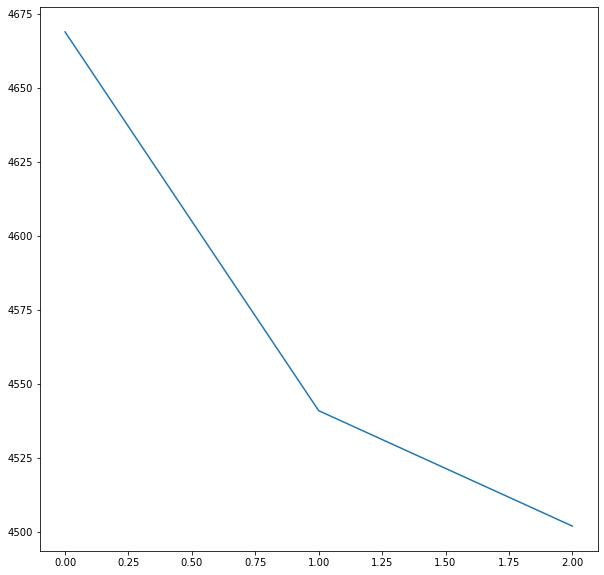

In [103]:
r = r_swap2first_swap3best[:]; d_min=d_swap2first_swap3best; dm_s2f_s3b_s2b=[d_swap2first_swap3best]; i_s2f_s3b_s2b=[0]; j_s2f_s3b_s2b=[0]; dc_s2f_s3b_s2b=[0];
while swap2best():
    dm_s2f_s3b_s2b.append(d_min)
    i_s2f_s3b_s2b.append(i_opt)
    j_s2f_s3b_s2b.append(j_opt)
    dc_s2f_s3b_s2b.append(dc_min)
d_s2f_s3b_s2b = d_min
r_s2f_s3b_s2b = r
print("dm_s2f_s3b_s2b =",dm_s2f_s3b_s2b)
print("r_s2f_s3b_s2b =",r)
print("i_s2f_s3b_s2b =",i_s2f_s3b_s2b)
print("j_s2f_s3b_s2b =",j_s2f_s3b_s2b)
print("dc_s2f_s3b_s2b =",dc_s2f_s3b_s2b)
ver(r)
plt.figure(1, figsize=(10,10))
plt.plot(dm_s2f_s3b_s2b)

In [48]:
r_nn = [0, 18, 14, 4, 8, 7, 12, 2, 5, 20, 13, 11, 16, 1, 3, 6, 19, 9, 17, 10, 21, 15, 0]
d_nn = 4831.1

dm_swap2first = [12713.0, 11648.4, 11558.4, 11274.0, 11177.0, 10530.0, 10324.6, 10285.6, 9901.6, 9849.0, 9789.6, 9560.6, 9545.6, 9539.6, 9183.6, 8842.6, 8822.6, 8590.6, 8575.6, 8494.6, 8231.0, 8097.0, 7996.0, 7638.0, 7449.1, 7448.0, 7372.7, 7229.099999999999, 7216.099999999999, 6999.099999999999, 6930.099999999999, 6848.099999999999, 6816.099999999999, 6780.099999999999, 6757.099999999999, 6741.099999999999, 6610.099999999999, 6562.099999999999, 6509.099999999999, 6438.099999999999, 6429.099999999999, 6147.099999999999, 6131.099999999999, 6061.099999999999, 6042.099999999999, 6004.099999999999]
r_swap2first = [0, 6, 11, 16, 13, 12, 7, 8, 14, 10, 9, 17, 3, 1, 21, 4, 15, 18, 2, 5, 20, 19, 0]
i_swap2first = [0, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 8, 7, 8, 10, 16, 16, 14, 8, 17, 8, 18, 18, 19]
j_swap2first = [0, 2, 3, 12, 2, 4, 7, 2, 6, 6, 5, 2, 18, 16, 2, 4, 2, 3, 11, 2, 11, 13, 4, 17, 10, 9, 11, 13, 20, 18, 20, 8, 15, 15, 8, 14, 11, 20, 21, 16, 16, 20, 16, 19, 21, 20]
dc_swap2first = [0, -1064.6, -90.00000000000011, -284.4000000000001, -97.0, -647.0, -205.39999999999998, -39.0, -384.0, -52.59999999999991, -59.39999999999998, -229.0, -15.0, -6.0, -356.0, -341.0, -20.0, -232.0, -15.0, -81.0, -263.6, -134.0, -101.0, -358.0, -188.9000000000001, -1.099999999999909, -75.30000000000007, -143.60000000000002, -13.0, -217.0, -69.0, -82.0, -32.0, -36.0, -23.0, -16.0, -131.0, -48.0, -53.0, -71.0, -9.0, -282.0, -16.0, -70.0, -19.0, -38.0]

dm_swap2best = [12713.0, 10830.0, 9493.0, 8615.0, 7916.0, 6833.0, 6098.0, 5514.4, 5332.0, 5077.0, 4947.0, 4831.1, 4609.1, 4585.1, 4577.1]
r_swap2best = [0, 18, 14, 12, 7, 8, 15, 4, 21, 2, 10, 9, 17, 6, 3, 1, 11, 16, 13, 19, 20, 5, 0]
i_swap2best = [0, 3, 1, 11, 5, 6, 9, 13, 4, 5, 16, 12, 13, 2, 11]
j_swap2best = [0, 12, 18, 17, 21, 15, 14, 18, 7, 8, 17, 14, 15, 9, 12]
dc_swap2best = [0, -1883.0, -1337.0, -878.0, -699.0, -1083.0, -735.0, -583.6, -182.39999999999998, -255.0, -130.0, -115.89999999999998, -222.0, -24.0, -8.0]

dm_swap3first = [12713.0, 11558.4, 9330.0, 8164.0, 7281.1, 6814.1, 6432.1, 5961.1, 5826.1, 5823.0, 5797.1, 5735.1, 5575.6, 5445.0, 5354.0, 5179.0, 4828.0, 4397.0, 4336.0, 4278.1, 4251.1]
r_swap3first = [0, 18, 21, 4, 8, 15, 14, 12, 7, 2, 5, 20, 13, 16, 11, 3, 1, 17, 9, 10, 6, 19, 0]
i_swap3first = [0, 1, 6, 5, 9, 3, 10, 11, 6, 16, 16, 12, 2, 1, 1, 12, 2, 1, 1, 17, 3]
j_swap3first = [0, 2, 12, 15, 18, 9, 15, 14, 7, 17, 17, 15, 16, 14, 11, 13, 10, 9, 2, 18, 4]
k_swap3first = [0, 3, 16, 18, 21, 14, 16, 21, 8, 18, 18, 20, 19, 15, 12, 14, 21, 10, 3, 19, 6]
dc_swap3first = [0, -1154.6, -2228.4, -1166.0, -882.9000000000001, -467.0, -382.0, -471.0, -135.0, -3.1000000000000227, -25.899999999999977, -62.0, -159.5, -130.5999999999999, -91.0, -175.0, -351.0, -431.0, -61.0, -57.89999999999998, -27.0]

dm_swap3best = [12713.0, 10204.0, 8664.0, 7856.6, 6268.6, 5430.6, 5034.1, 4834.1, 4735.1]
r_swap3best = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 1, 3, 16, 13, 11, 6, 17, 9, 10, 5, 20, 2, 0]
i_swap3best = [0, 3, 1, 3, 5, 2, 9, 5, 9]
j_swap3best = [0, 12, 10, 6, 14, 8, 16, 6, 11]
k_swap3best = [0, 16, 18, 15, 19, 21, 17, 8, 14]
dc_swap3best = [0, -2509.0, -1540.0, -807.4000000000001, -1588.0, -838.0, -396.5, -200.0, -99.0]

dm_nn_swap2first = [4831.1, 4800.1, 4777.1, 4638.1, 4502.1, 4459.1, 4370.1, 4362.1]
r_nn_swap2first = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_swap2first = [0, 2, 1, 1, 2, 11, 15, 17]
j_nn_swap2first = [0, 20, 21, 2, 3, 12, 16, 18]
dc_nn_swap2first = [0, -31.0, -23.0, -139.0, -136.0, -43.0, -89.0, -8.0]

dm_nn_swap2best = [4831.1, 4700.1, 4611.1, 4568.1, 4537.1, 4415.1, 4370.1, 4362.1]
r_nn_swap2best = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_swap2best = [0, 3, 15, 11, 2, 1, 20, 17]
j_nn_swap2best = [0, 21, 16, 12, 21, 20, 21, 18]
dc_nn_swap2best = [0, -131.0, -89.0, -43.0, -31.0, -122.0, -45.0, -8.0]

dm_nn_swap3first = [4831.1, 4668.1, 4667.1, 4632.1]
r_nn_swap3first = [0, 21, 4, 8, 15, 7, 12, 2, 5, 20, 13, 11, 16, 1, 3, 6, 19, 9, 17, 10, 18, 14, 0]
i_nn_swap3first = [0, 1, 2, 1]
j_nn_swap3first = [0, 2, 3, 20]
k_nn_swap3first = [0, 21, 4, 21]
dc_nn_swap3first = [0, -163.0, -1.0, -35.0]

dm_nn_swap3best = [4831.1, 4668.1, 4667.1, 4632.1]
r_nn_swap3best = [0, 21, 4, 8, 15, 7, 12, 2, 5, 20, 13, 11, 16, 1, 3, 6, 19, 9, 17, 10, 18, 14, 0]
i_nn_swap3best = [0, 1, 2, 1]
j_nn_swap3best = [0, 2, 3, 20]
k_nn_swap3best = [0, 21, 4, 21]
dc_nn_swap3best = [0, -163.0, -1.0, -35.0]

dm_swap2first_swap3first = [6004.099999999999, 5922.099999999999, 5873.5, 5775.1, 5473.1, 5253.1, 5110.1, 5049.1, 4991.0, 4933.1, 4871.1]
r_swap2first_swap3first = [0, 19, 11, 16, 13, 20, 5, 2, 10, 9, 17, 1, 3, 6, 21, 4, 15, 8, 12, 7, 14, 18, 0]
i_swap2first_swap3first = [0, 7, 5, 6, 7, 5, 1, 18, 8, 8, 1]
j_swap2first_swap3first = [0, 8, 18, 18, 18, 8, 5, 19, 11, 9, 7]
k_swap2first_swap3first = [0, 17, 21, 19, 20, 21, 7, 20, 13, 10, 13]
dc_swap2first_swap3first = [0, -82.0, -48.59999999999991, -98.40000000000009, -302.0, -220.0, -143.0, -61.0, -58.09999999999991, -57.89999999999998, -62.0]

dm_swap2first_swap3best = [6004.099999999999, 5922.099999999999, 5873.5, 5775.1, 5473.1, 5218.1, 5068.1, 4960.1, 4792.1, 4730.1, 4669.1]
r_swap2first_swap3best = [0, 2, 5, 20, 13, 11, 16, 19, 6, 10, 9, 17, 3, 1, 21, 4, 15, 8, 12, 7, 14, 18, 0]
i_swap2first_swap3best = [0, 7, 5, 6, 7, 1, 5, 2, 3, 4, 18]
j_swap2first_swap3best = [0, 8, 18, 18, 18, 8, 6, 4, 5, 5, 19]
k_swap2first_swap3best = [0, 17, 21, 19, 20, 21, 7, 5, 6, 6, 20]
dc_swap2first_swap3best = [0, -82.0, -48.59999999999991, -98.40000000000009, -302.0, -255.0, -150.0, -108.0, -168.0, -62.0, -61.0]

dm_swap2best_swap3first = [4577.1, 4511.1, 4438.1, 4240.1]
r_swap2best_swap3first = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 17, 9, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
i_swap2best_swap3first = [0, 19, 9, 9]
j_swap2best_swap3first = [0, 20, 13, 10]
k_swap2best_swap3first = [0, 21, 21, 12]
dc_swap2best_swap3first = [0, -66.0, -73.0, -198.0]

dm_swap2best_swap3best = [4577.1, 4511.1, 4438.1, 4240.1]
r_swap2best_swap3best = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 17, 9, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
i_swap2best_swap3best = [0, 19, 9, 9]
j_swap2best_swap3best = [0, 20, 13, 10]
k_swap2best_swap3best = [0, 21, 21, 12]
dc_swap2best_swap3best = [0, -66.0, -73.0, -198.0]

dm_swap3first_swap2first = [4251.1, 4194.1, 4129.1, 4014.1000000000004]
r_swap3first_swap2first = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
i_swap3first_swap2first = [0, 4, 7, 15]
j_swap3first_swap2first = [0, 5, 8, 16]
dc_swap3first_swap2first = [0, -57.0, -65.0, -115.0]

dm_swap3first_swap2best = [4251.1, 4136.1, 4071.1000000000004, 4014.1000000000004]
r_swap3first_swap2best = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
i_swap3first_swap2best = [0, 15, 7, 4]
j_swap3first_swap2best = [0, 16, 8, 5]
dc_swap3first_swap2best = [0, -115.0, -65.0, -57.0]

dm_swap3best_swap2first = [4735.1, 4719.1, 4712.1]
r_swap3best_swap2first = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
i_swap3best_swap2first = [0, 10, 19]
j_swap3best_swap2first = [0, 11, 20]
dc_swap3best_swap2first = [0, -16.0, -7.0]

dm_swap3best_swap2best = [4735.1, 4719.1, 4712.1]
r_swap3best_swap2best = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
i_swap3best_swap2best = [0, 10, 19]
j_swap3best_swap2best = [0, 11, 20]
dc_swap3best_swap2best = [0, -16.0, -7.0]

dm_s2f_s3f_s2f = [4871.1, 4869.1, 4791.1, 4752.1]
r_s2f_s3f_s2f = [0, 2, 11, 16, 13, 20, 5, 19, 10, 9, 17, 3, 1, 6, 21, 4, 15, 8, 7, 12, 14, 18, 0]
i_s2f_s3f_s2f = [0, 1, 11, 18]
j_s2f_s3f_s2f = [0, 7, 12, 19]
dc_s2f_s3f_s2f = [0, -2.0, -78.0, -39.0]

dm_s2f_s3f_s2b = [4871.1, 4793.1, 4754.1, 4752.1]
r_s2f_s3f_s2b = [0, 2, 11, 16, 13, 20, 5, 19, 10, 9, 17, 3, 1, 6, 21, 4, 15, 8, 7, 12, 14, 18, 0]
i_s2f_s3f_s2b = [0, 11, 18, 1]
j_s2f_s3f_s2b = [0, 12, 19, 7]
dc_s2f_s3f_s2b = [0, -78.0, -39.0, -2.0]

dm_s2f_s3b_s2f = [4669.1, 4541.1, 4502.1]
r_s2f_s3b_s2f = [0, 2, 5, 20, 13, 16, 11, 19, 6, 10, 9, 17, 3, 1, 21, 4, 15, 8, 7, 12, 14, 18, 0]
i_s2f_s3b_s2f = [0, 5, 18]
j_s2f_s3b_s2f = [0, 6, 19]
dc_s2f_s3b_s2f = [0, -128.0, -39.0]

dm_s2f_s3b_s2b = [4669.1, 4541.1, 4502.1]
r_s2f_s3b_s2b = [0, 2, 5, 20, 13, 16, 11, 19, 6, 10, 9, 17, 3, 1, 21, 4, 15, 8, 7, 12, 14, 18, 0]
i_s2f_s3b_s2b = [0, 5, 18]
j_s2f_s3b_s2b = [0, 6, 19]
dc_s2f_s3b_s2b = [0, -128.0, -39.0]

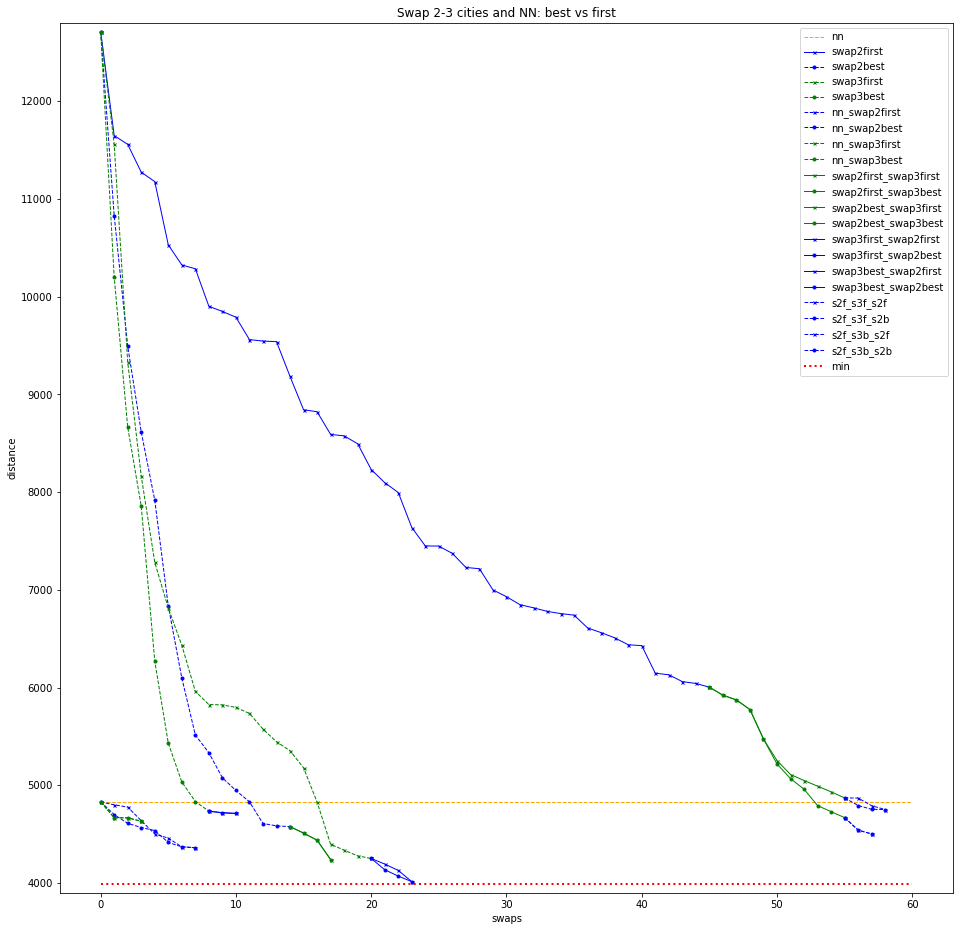

In [104]:
plt.figure(1, figsize=(16,16))
plt.title('Swap 2-3 cities and NN: best vs first', loc='center')
plt.plot(np.array([d_nn]*(len(dm_swap2first)+len(dm_swap2first_swap3first)+len(dm_s2f_s3f_s2f))), color='orange', linestyle='dashed', linewidth=1)
plt.plot(dm_swap2first, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=3)
plt.plot(dm_swap2best, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
plt.plot(dm_swap3first, color='green', marker='x', linestyle='dashed', linewidth=1, markersize=3)
plt.plot(dm_swap3best, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=3)
plt.plot(dm_nn_swap2first, color='blue', marker='x', linestyle='dashed', linewidth=1, markersize=3)
plt.plot(dm_nn_swap2best, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
plt.plot(dm_nn_swap3first, color='green', marker='x', linestyle='dashed', linewidth=1, markersize=3)
plt.plot(dm_nn_swap3best, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=3)
plt.plot(np.arange(len(dm_swap2first)-1, len(dm_swap2first)+len(dm_swap2first_swap3first)-1), dm_swap2first_swap3first, color='green', marker='x', linestyle='solid', linewidth=1, markersize=3)
plt.plot(np.arange(len(dm_swap2first)-1, len(dm_swap2first)+len(dm_swap2first_swap3best)-1), dm_swap2first_swap3best, color='green', marker='o', linestyle='solid', linewidth=1, markersize=3)
plt.plot(np.arange(len(dm_swap2best)-1, len(dm_swap2best)+len(dm_swap2best_swap3first)-1), dm_swap2best_swap3first, color='green', marker='x', linestyle='solid', linewidth=1, markersize=3)
plt.plot(np.arange(len(dm_swap2best)-1, len(dm_swap2best)+len(dm_swap2best_swap3best)-1), dm_swap2best_swap3best, color='green', marker='o', linestyle='solid', linewidth=1, markersize=3)
plt.plot(np.arange(len(dm_swap3first)-1, len(dm_swap3first)+len(dm_swap3first_swap2first)-1), dm_swap3first_swap2first, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=3)
plt.plot(np.arange(len(dm_swap3first)-1, len(dm_swap3first)+len(dm_swap3first_swap2best)-1), dm_swap3first_swap2best, color='blue', marker='o', linestyle='solid', linewidth=1, markersize=3)
plt.plot(np.arange(len(dm_swap3best)-1, len(dm_swap3best)+len(dm_swap3best_swap2first)-1), dm_swap3best_swap2first, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=3)
plt.plot(np.arange(len(dm_swap3best)-1, len(dm_swap3best)+len(dm_swap3best_swap2best)-1), dm_swap3best_swap2best, color='blue', marker='o', linestyle='solid', linewidth=1, markersize=3)
plt.plot(np.arange(len(dm_swap2first)+len(dm_swap2first_swap3first)-2, len(dm_swap2first)+len(dm_swap2first_swap3first)+len(dm_s2f_s3f_s2f)-2), dm_s2f_s3f_s2f, color='blue', marker='x', linestyle='dashed', linewidth=1, markersize=3)
plt.plot(np.arange(len(dm_swap2first)+len(dm_swap2first_swap3first)-2, len(dm_swap2first)+len(dm_swap2first_swap3first)+len(dm_s2f_s3f_s2b)-2), dm_s2f_s3f_s2b, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
plt.plot(np.arange(len(dm_swap2first)+len(dm_swap2first_swap3best)-2, len(dm_swap2first)+len(dm_swap2first_swap3best)+len(dm_s2f_s3b_s2f)-2), dm_s2f_s3b_s2f, color='blue', marker='x', linestyle='dashed', linewidth=1, markersize=3)
plt.plot(np.arange(len(dm_swap2first)+len(dm_swap2first_swap3best)-2, len(dm_swap2first)+len(dm_swap2first_swap3best)+len(dm_s2f_s3b_s2b)-2), dm_s2f_s3b_s2b, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
plt.plot(np.array([d_minimal]*(len(dm_swap2first)+len(dm_swap2first_swap3first)+len(dm_s2f_s3f_s2f))), color='red', linestyle='dotted', linewidth=2)
plt.xlabel("swaps")
plt.ylabel("distance")
plt.ylim([3900, 12800])
plt.legend(["nn", "swap2first", "swap2best", "swap3first", "swap3best", "nn_swap2first", "nn_swap2best", "nn_swap3first", "nn_swap3best", "swap2first_swap3first", "swap2first_swap3best", "swap2best_swap3first", "swap2best_swap3best", "swap3first_swap2first", "swap3first_swap2best", "swap3best_swap2first", "swap3best_swap2best", "s2f_s3f_s2f", "s2f_s3f_s2b", "s2f_s3b_s2f", "s2f_s3b_s2b", "min"])
plt.show()

In [105]:
d_best = {"nn":d_nn,
          "s2f":d_swap2first,
          "s2b":d_swap2best,
          "s3f":d_swap3first,
          "s3b":d_swap3best,
          "nn_s2f":d_nn_swap2first,
          "nn_s2b":d_nn_swap2best,
          "nn_s3f":d_nn_swap3first,
          "nn_s3b":d_nn_swap3best,
          "s2f_s3f":d_swap2first_swap3first,
          "s2f_s3b":d_swap2first_swap3best,
          "s2b_s3f":d_swap2best_swap3first,
          "s2b_s3b":d_swap2best_swap3best,
          "s3f_s2f":d_swap3first_swap2first,
          "s3f_s2b":d_swap3first_swap2best,
          "s3b_s2f":d_swap3best_swap2first,
          "s3b_s2b":d_swap3best_swap2best,
          "s2f_s3f_s2f":d_s2f_s3f_s2f,
          "s2f_s3f_s2b":d_s2f_s3f_s2b,
          "s2f_s3b_s2f":d_s2f_s3b_s2f,
          "s2f_s3b_s2b":d_s2f_s3b_s2b,
          "optimal":d_opt,
          "minimal":d_minimal}
d_best = sorted(d_best.items(), key=lambda x:x[1])
sortdict = dict(d_best)
print(sortdict)

{'optimal': 3986.1, 'minimal': 3986.1, 's3f_s2f': 4014.1000000000004, 's3f_s2b': 4014.1000000000004, 's2b_s3f': 4240.1, 's2b_s3b': 4240.1, 's3f': 4251.1, 'nn_s2f': 4362.1, 'nn_s2b': 4362.1, 's2f_s3b_s2f': 4502.1, 's2f_s3b_s2b': 4502.1, 's2b': 4577.1, 'nn_s3f': 4632.1, 'nn_s3b': 4632.1, 's2f_s3b': 4669.1, 's3b_s2f': 4712.1, 's3b_s2b': 4712.1, 's3b': 4735.1, 's2f_s3f_s2f': 4752.1, 's2f_s3f_s2b': 4752.1, 'nn': 4831.1, 's2f_s3f': 4871.1, 's2f': 6004.099999999999}
